# Advance Regression Assignment:

. <b><u>Probelm Statement</b></u>

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

<i>The company wants to know:</i>
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
 
. <b><u>Business Goal</b></u>

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [93]:
# Importing neccesary libralies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

from scipy import stats
from scipy.stats import norm, skew #for some statistics

import os

#hide warnings
import warnings
warnings.filterwarnings('ignore')

In [94]:
#Reading the dataset
home_df= pd.read_csv('train.csv')
pd.options.display.max_columns=350
home_df.drop(['Id'],axis=1,inplace=True)
home_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Understanding:

In [95]:
home_df.info()
print(home_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [96]:
home_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- <p style="color:blue"><b><u> Checking the Target variable</u></b></p>


 mu = 180921.20 and sigma = 79415.29



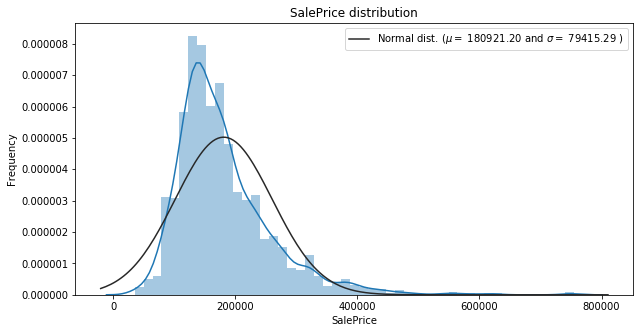

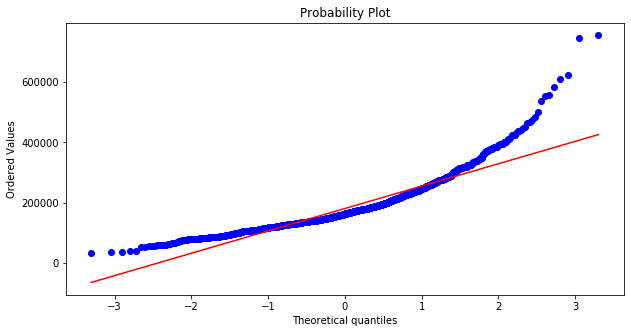

In [97]:
plt.figure(figsize=(10,5))
sns.distplot(home_df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(home_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure(figsize=(10,5))
res = stats.probplot(home_df['SalePrice'], plot=plt)
plt.show()

- Mean of SalePrice is : ~180921
- variance of SalePrice : ~79415

- <b><u><p style="color:green">Log Transformation of 'SalePrice'</u></p></b>


 mu = 12.02 and sigma = 0.40



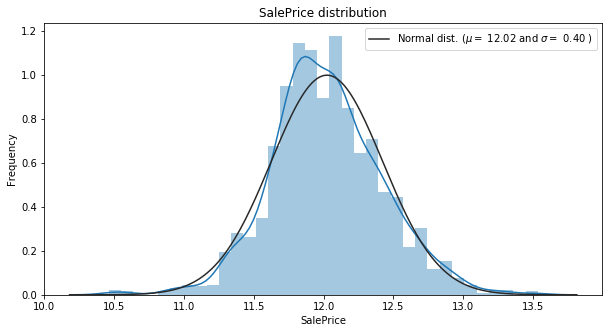

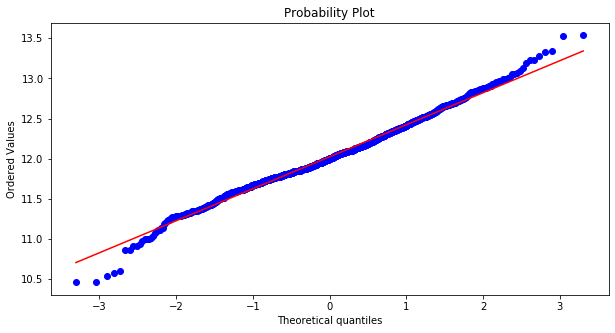

In [98]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
plt.figure(figsize=(10,5))
#home_df["SalePrice"] = np.log1p(home_df["SalePrice"])
home_df["SalePrice"] = np.log(home_df["SalePrice"])

#Check the new distribution 
sns.distplot(home_df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(home_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure(figsize=(10,5))
res = stats.probplot(home_df['SalePrice'], plot=plt)
plt.show()

- Mean of SalePrice is : 12.02
- variance of SalePrice : 0.40

- <b><u>Checking the Null Values</b><u/>

In [99]:
#Checking the Null value Percentage
total = home_df.isnull().sum().sort_values(ascending=False)
percent = (home_df.isnull().sum()/home_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


- <b><p style="color:blue"><p style="font-size:15px">Observation</b></p></p>

 As we can see some of the variable has vry large percentange of null values. So those values are of no used to us. So we are going to deop all those columns which has null value percentage more than 30 percent.

- Dropping columns with null values more than 30 percent

  <b>columns</b>: ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

In [100]:
#drop_columns= ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']
drop_columns= ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
home_df=home_df.drop(drop_columns, axis=1)

In [101]:
home_df.shape

(1460, 75)

 <u> Managing the NULL Values</u>

 - For <b>Numerical Columns</b> replacing the null values with the mean values
 - And for <b>Categorical Columsn</b> replacing it with mode values.

In [102]:
# Reoplacing the null values with the median
home_df.LotFrontage=home_df.LotFrontage.fillna(home_df.LotFrontage.median())

In [103]:
#Dropping all those rows which has null values in more than 5 columns.

home_df.drop(home_df[home_df.isnull().sum(axis=1)>5].index,axis=0,inplace=True)

In [104]:
#Checking the Null value Percentage

total = home_df.isnull().sum().sort_values(ascending=False)
percent = (home_df.isnull().sum()/home_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
GarageType,74,0.050929
GarageYrBlt,74,0.050929
GarageFinish,74,0.050929
GarageCond,74,0.050929
GarageQual,74,0.050929
BsmtExposure,31,0.021335
BsmtFinType2,31,0.021335
BsmtFinType1,30,0.020647
BsmtCond,30,0.020647
BsmtQual,30,0.020647


In [105]:
home_df.shape

(1453, 75)

In [106]:
# Replacing all the Categorical NUll values with MODE.

#home_df[missing_values]=home_df[missing_values].apply(lambda x: x.fillna(x.mode, inplace=True))

missing_values=['GarageType','GarageYrBlt','GarageFinish','GarageCond','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','Electrical']

for column in home_df[missing_values]:
    home_df[column].fillna(home_df[column].mode()[0], inplace=True)

In [107]:
#Checking the Null value Percentage

total = home_df.isnull().sum().sort_values(ascending=False)
percent = (home_df.isnull().sum()/home_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
MasVnrArea,8,0.005506
SalePrice,0,0.000000
YearRemodAdd,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000


In [108]:
home_df.MasVnrArea=home_df.MasVnrArea.fillna(home_df.LotFrontage.median())

In [109]:
#Checking the Null value Percentage

total = home_df.isnull().sum().sort_values(ascending=False)
percent = (home_df.isnull().sum()/home_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
SalePrice,0,0.0
YearRemodAdd,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0


- Now we have zero NULL values

In [110]:
home_df.shape

(1453, 75)

### Understanding the Data

#### Numerical Columns:

In [111]:
# Selcting all those columns with the numerical values.

#home_numeric = home_df.select_dtypes(include=['int64', 'float64'])
home_numeric = home_df.select_dtypes(include=[np.number])
home_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247694
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109011
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317167
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849398
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429216


In [112]:
print(home_numeric.shape)
print(home_numeric.columns)

(1453, 37)
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [113]:
home_numeric.nunique().sort_values(ascending=False)

LotArea          1069
GrLivArea         859
BsmtUnfSF         780
1stFlrSF          750
TotalBsmtSF       721
SalePrice         660
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        328
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     119
YearBuilt         112
LotFrontage       110
GarageYrBlt        97
ScreenPorch        76
YearRemodAdd       61
LowQualFinSF       24
3SsnPorch          20
MiscVal            20
MSSubClass         15
MoSold             12
TotRmsAbvGrd       11
OverallQual        10
OverallCond         9
BedroomAbvGr        8
PoolArea            8
YrSold              5
GarageCars          5
BsmtFullBath        4
KitchenAbvGr        4
Fireplaces          4
FullBath            4
BsmtHalfBath        3
HalfBath            3
dtype: int64

- <b><p style="color:blue"><p style="font-size:15px">Observation</b></p></p>

As we can see there are many columns which has finite number of unique values. They are most probably categorical columns.

<b><p style="color:blue"><i><u>Checking the categorical columns</i></u></p>


In [114]:
print("Unique values count in MSSubClass columns is:")
print(home_numeric['MSSubClass'].value_counts().sort_values(ascending=False))

Unique values count in MSSubClass columns is:
20     534
60     299
50     143
120     87
30      69
160     63
70      60
80      58
90      50
190     28
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


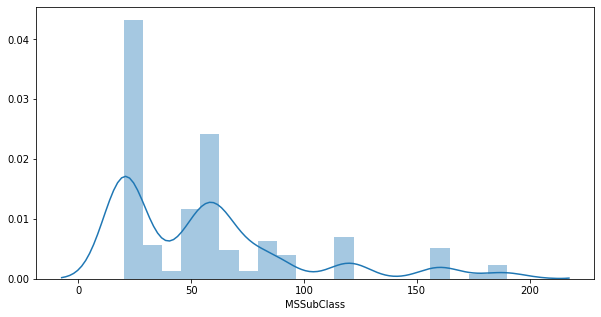

In [115]:
plt.figure(figsize=(10,5))
sns.distplot(home_numeric['MSSubClass'])

In [116]:
print("Unique values count in GarageCars columns is:")
print(home_numeric['GarageCars'].value_counts().sort_values(ascending=False))

Unique values count in GarageCars columns is:
2    824
1    369
3    181
0     74
4      5
Name: GarageCars, dtype: int64


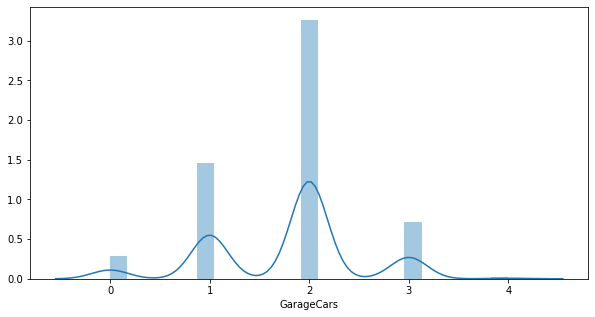

In [117]:
plt.figure(figsize=(10,5))
sns.distplot(home_numeric['GarageCars'])

- <b><p style="color:blue"><p style="font-size:15px">Observation</b></p></p>

 As it is clearly visisble that many of the columns are categorical but they have numerical values. So we are going to change the data type.

<u>Columsn for which we are going  to change the datatype to object.</u>

['MSSubClass', 'OverallQual', 'OverallCond','LowQualFinSF','BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold']
    

In [118]:
#Changing the data type

object_type= ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold']
home_df[object_type]=home_df[object_type].astype('object')

#### Categorical Columns

In [119]:
home_categorical=home_df.select_dtypes(exclude=[np.number])

print("List of columsn which are categorical")
print(home_categorical.columns)

print("Shape of categorical datafram:")
print(home_categorical.shape)

List of columsn which are categorical
Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')
Shape of categorical datafram:
(1453, 56)


In [120]:
print("Uniue values counts in categorical columns are:")
home_categorical.nunique().head(60).sort_values(ascending=False)

Uniue values counts in categorical columns are:


ScreenPorch      76
Neighborhood     25
LowQualFinSF     24
3SsnPorch        20
Exterior2nd      16
MSSubClass       15
Exterior1st      14
MoSold           12
TotRmsAbvGrd     11
OverallQual      10
SaleType          9
OverallCond       9
Condition1        9
RoofMatl          8
HouseStyle        8
Condition2        8
BedroomAbvGr      8
PoolArea          8
Functional        7
RoofStyle         6
Foundation        6
BsmtFinType1      6
Heating           6
SaleCondition     6
GarageType        6
BsmtFinType2      6
HeatingQC         5
GarageCars        5
MSZoning          5
LotConfig         5
YrSold            5
GarageCond        5
BldgType          5
GarageQual        5
Electrical        5
ExterCond         5
ExterQual         4
BsmtQual          4
LotShape          4
LandContour       4
FullBath          4
BsmtExposure      4
MasVnrType        4
BsmtCond          4
BsmtFullBath      4
Fireplaces        4
KitchenQual       4
KitchenAbvGr      4
HalfBath          3
PavedDrive        3


- <b><p style="color:blue"><p style="font-size:15px">Observation</b></p></p>
 
 As we can see few columns have very large number of categorical unique values. they may not be categorical. So chcecking these columns.
 


<i><u>These columns are:</i></u>
 
['ScreenPorch','LowQualFinSF','3SsnPorch']

In [121]:
print("Unique values count in ScreenPorch columns is:")
print(home_numeric['ScreenPorch'].value_counts().head(15).sort_values(ascending=False))

Unique values count in ScreenPorch columns is:
0      1337
192       6
120       5
224       5
180       4
189       4
90        3
147       3
126       3
144       3
168       3
160       3
216       2
198       2
200       2
Name: ScreenPorch, dtype: int64


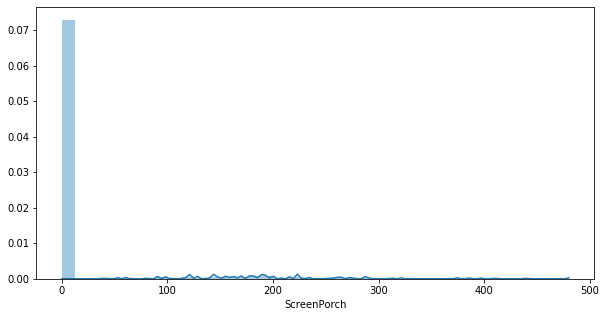

In [122]:
plt.figure(figsize=(10,5))
sns.distplot(home_numeric['ScreenPorch'])

In [123]:
print("Unique values count in 3SsnPorch columns is:")
print(home_numeric['3SsnPorch'].value_counts().head(60).sort_values(ascending=False))

Unique values count in 3SsnPorch columns is:
0      1429
168       3
216       2
144       2
180       2
23        1
245       1
238       1
290       1
196       1
508       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
182       1
Name: 3SsnPorch, dtype: int64


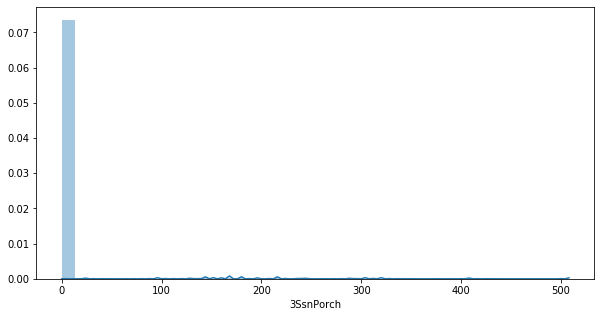

In [124]:
plt.figure(figsize=(10,5))
sns.distplot(home_numeric['3SsnPorch'])

- <b><p style="color:blue"><p style="font-size:15px">Observation</b></p></p>

As we can see these columns are more of numeical columns instead of categorical. So we are going to change their datatype.

In [125]:
#changing the data type to int.

int_type=['ScreenPorch','LowQualFinSF','3SsnPorch']
home_df[int_type]=home_df[int_type].astype('int')

### Data Cleaning:

<b> After correction of data type of columns checking all the columns again </b> 

- <b>Checking the Categorical columns again</b>

In [126]:
# categorical columns:

home_categorical=home_df.select_dtypes(exclude=[np.number])

print("Shape of categorical columns:")
print(home_categorical.shape)

print("Unique value count in each columns:")
print(home_categorical.nunique().sort_values(ascending=False))

Shape of categorical columns:
(1453, 53)
Unique value count in each columns:
Neighborhood     25
Exterior2nd      16
MSSubClass       15
Exterior1st      14
MoSold           12
TotRmsAbvGrd     11
OverallQual      10
OverallCond       9
SaleType          9
Condition1        9
HouseStyle        8
RoofMatl          8
Condition2        8
PoolArea          8
BedroomAbvGr      8
Functional        7
Foundation        6
RoofStyle         6
Heating           6
BsmtFinType2      6
SaleCondition     6
GarageType        6
BsmtFinType1      6
HeatingQC         5
GarageCars        5
MSZoning          5
LotConfig         5
YrSold            5
GarageCond        5
BldgType          5
GarageQual        5
Electrical        5
ExterCond         5
ExterQual         4
BsmtQual          4
LotShape          4
LandContour       4
FullBath          4
BsmtExposure      4
MasVnrType        4
BsmtCond          4
BsmtFullBath      4
Fireplaces        4
KitchenQual       4
KitchenAbvGr      4
HalfBath          3
Pav

In [127]:
# Understanding the categorical columns:

home_categorical.describe()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolArea,MoSold,YrSold,SaleType,SaleCondition
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453
unique,15,5,2,4,4,2,5,3,25,9,8,5,8,10,9,6,8,14,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,3,4,3,8,4,4,11,7,4,6,3,5,5,5,3,8,12,5,9,6
top,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,0,0,2,0,3,1,TA,6,Typ,0,Attchd,Unf,2,TA,TA,Y,0,6,2009,WD,Normal
freq,534,1146,1447,918,1305,1452,1046,1376,225,1253,1438,1217,722,395,816,1136,1427,513,503,865,901,1277,646,679,1341,984,460,1287,1421,741,1364,1331,849,1371,764,906,801,1389,731,401,1355,684,944,679,824,1385,1400,1339,1446,252,338,1260,1192


In [128]:
# Total number of unique value count in Categoircal columns:
sum=0
for columns in home_categorical:
    sum= sum+home_categorical[columns].nunique()
    #sum= sum-1          #checking the number of columns after adding dummy and removing the original one

print("Total number of unique value count in Categoircal columns:", sum)

Total number of unique value count in Categoircal columns: 338


- <b><u><p style="color:blue">Plotting all the categorical variable wrt to SalePrice</u></p></b>


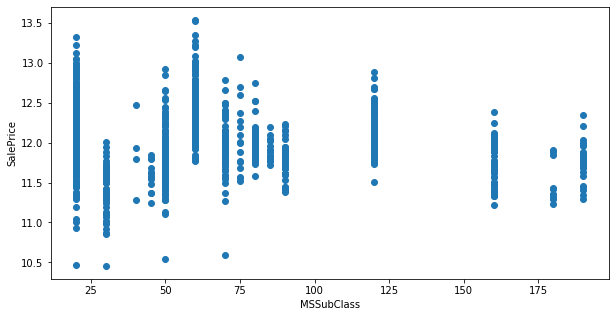

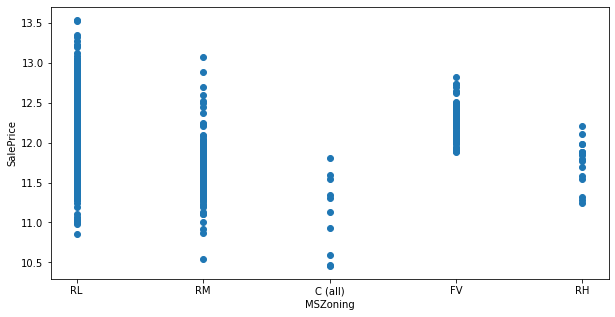

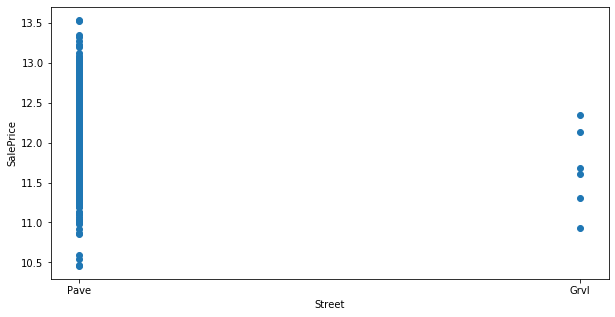

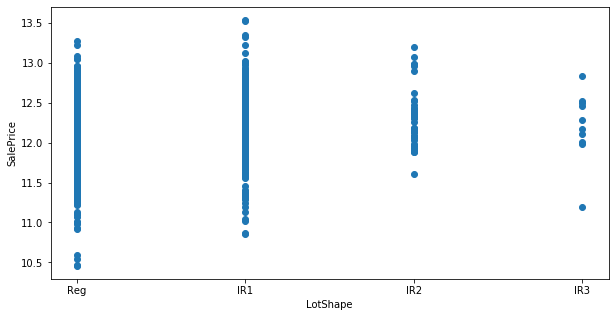

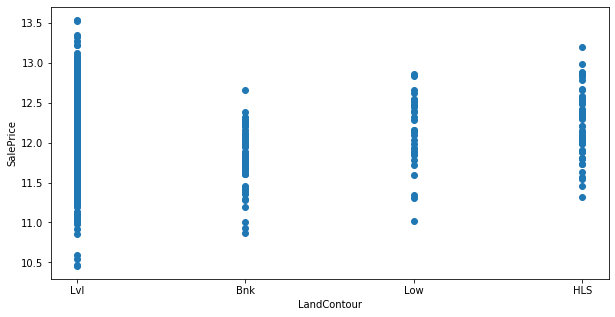

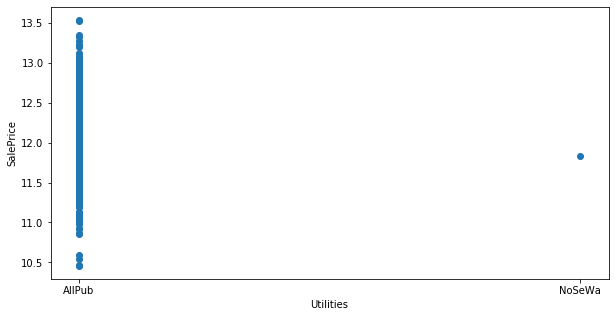

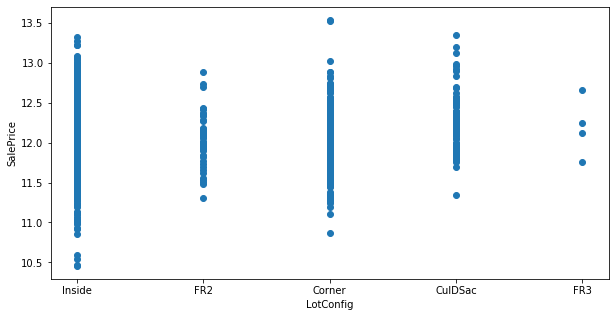

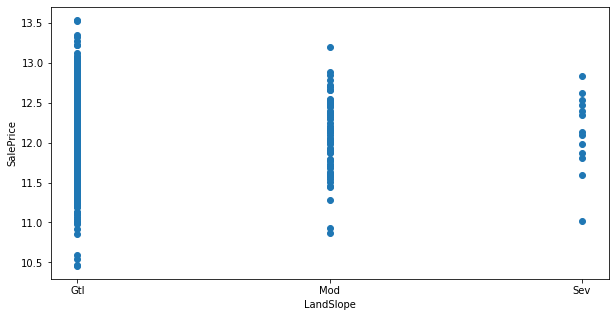

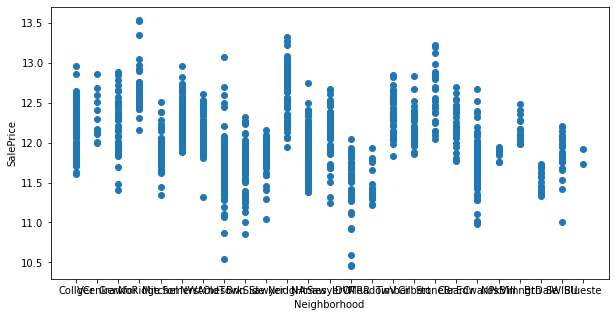

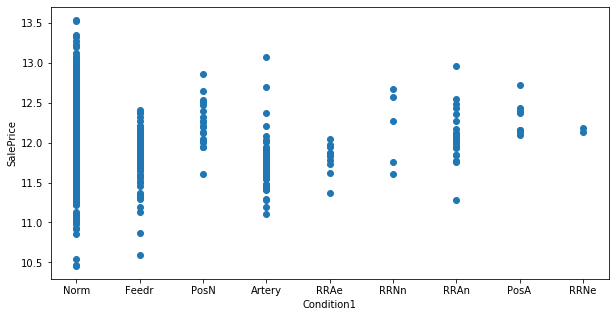

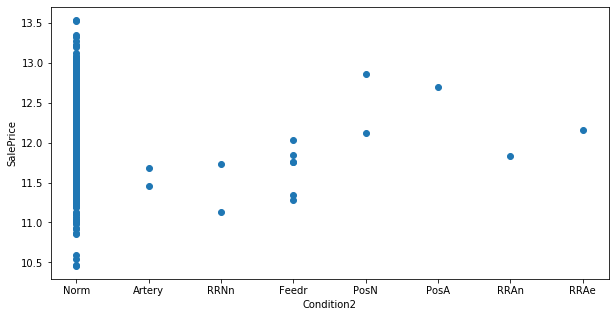

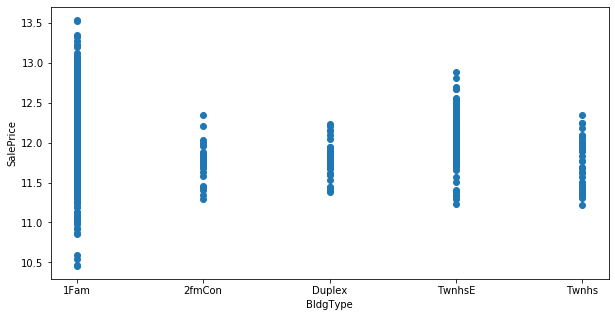

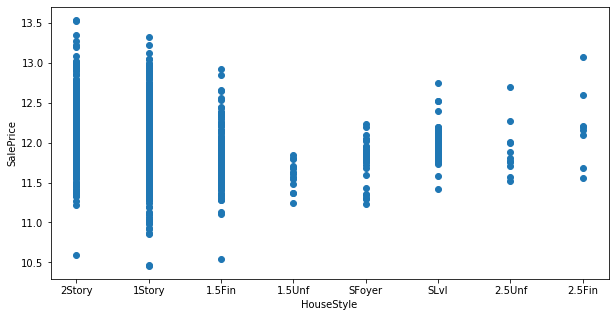

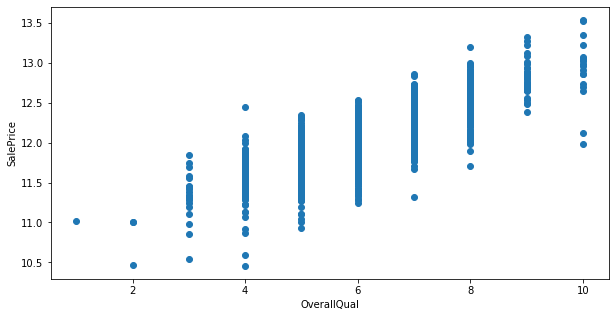

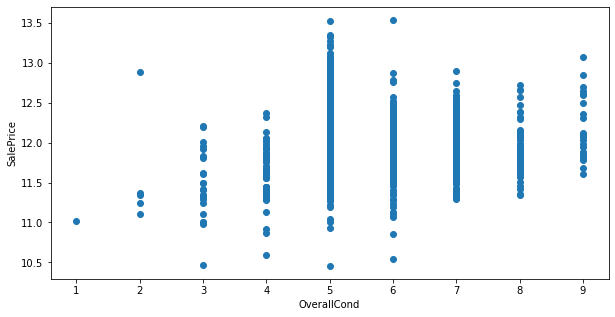

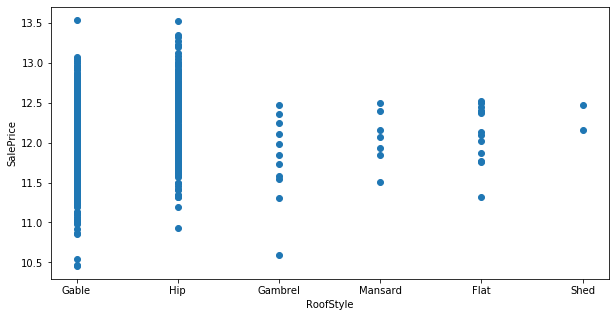

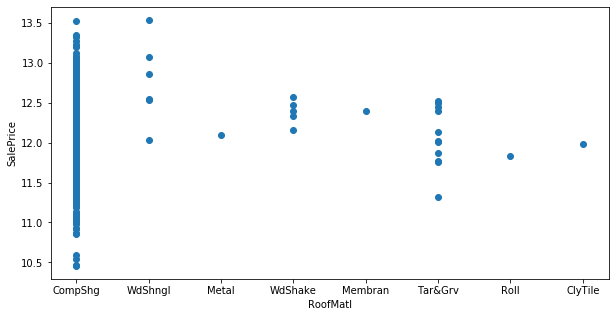

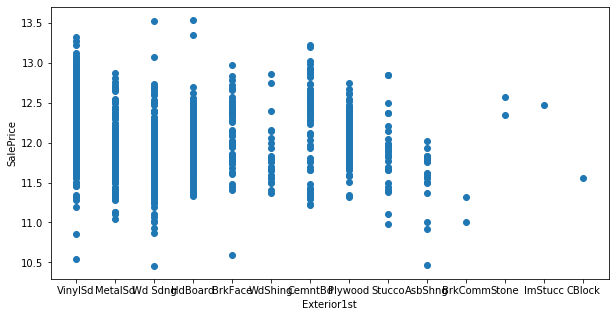

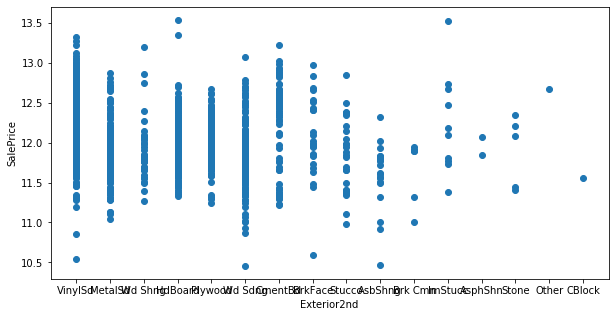

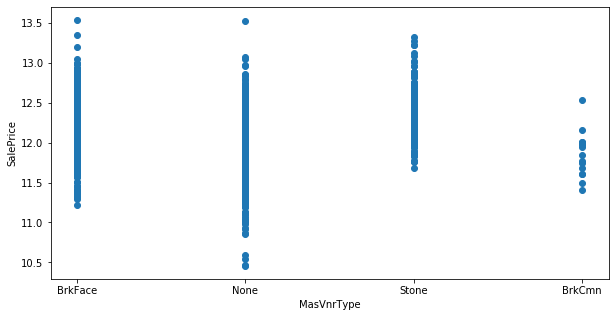

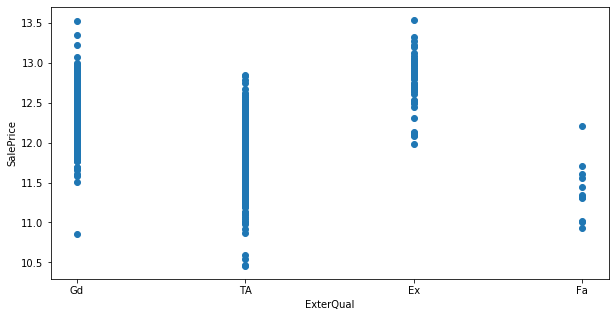

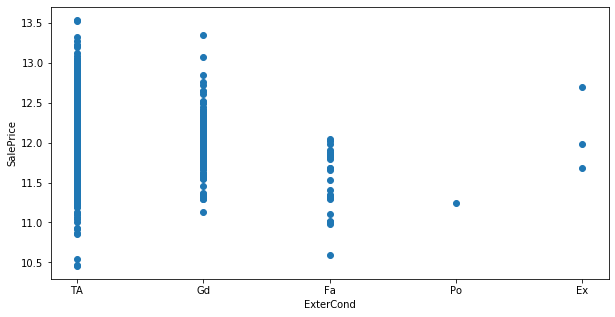

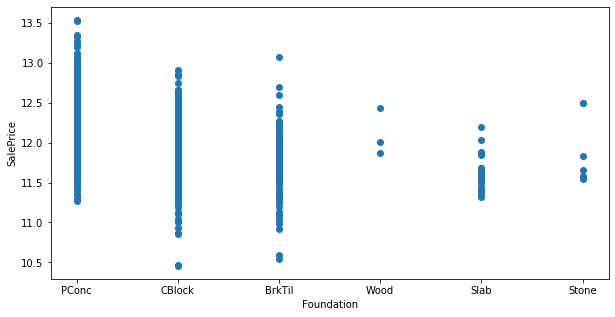

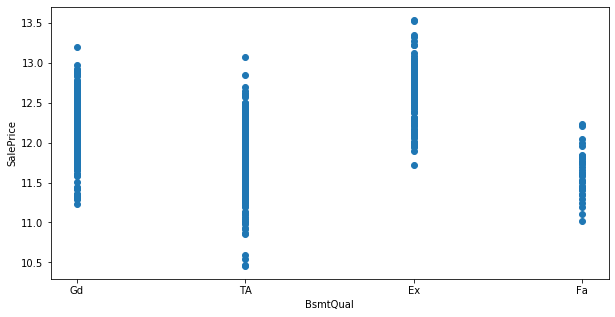

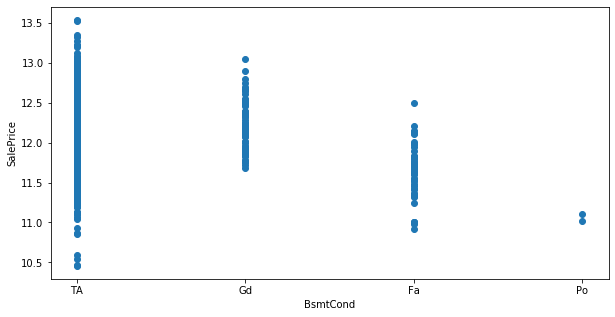

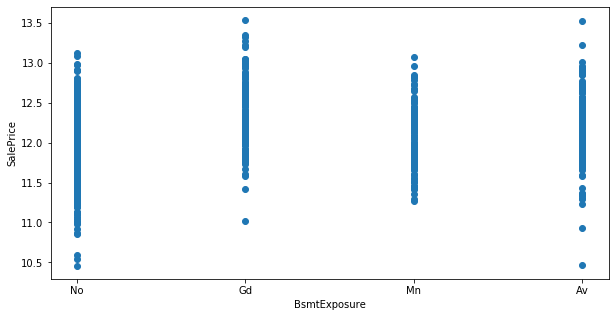

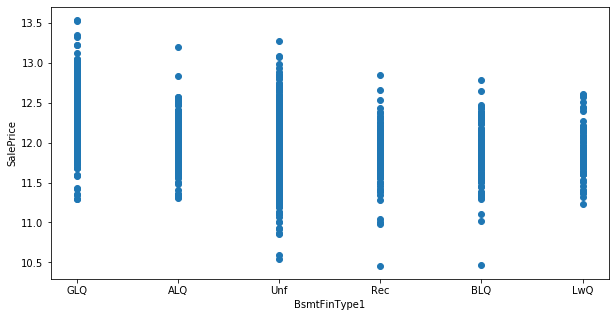

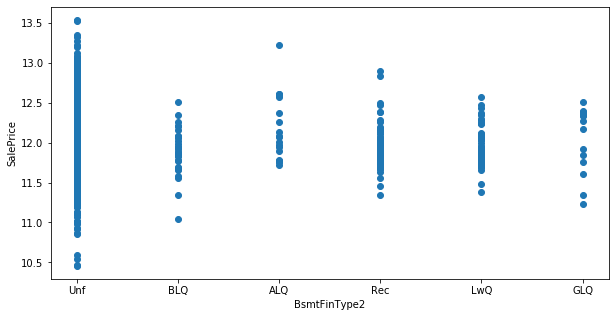

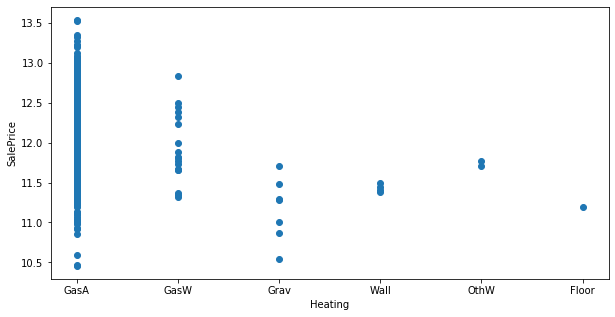

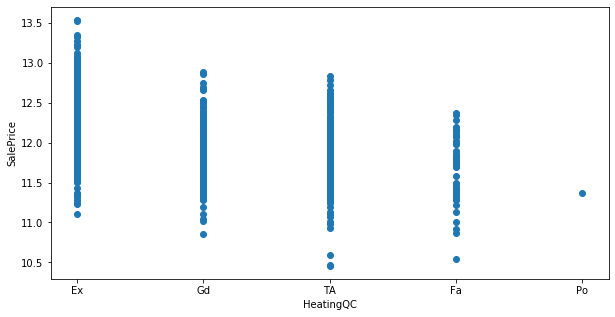

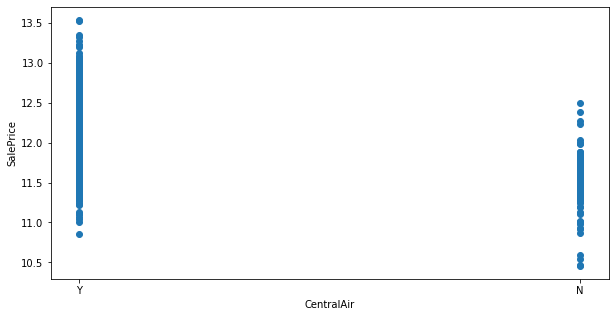

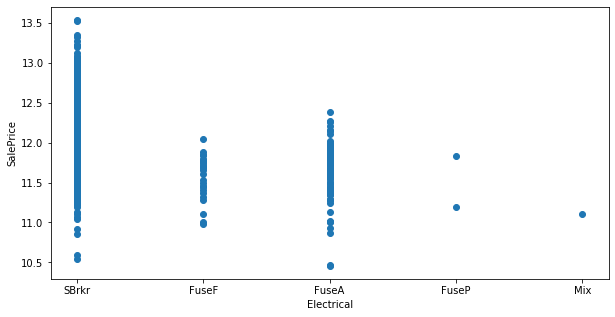

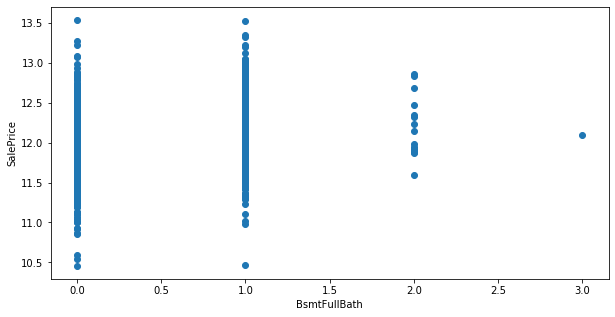

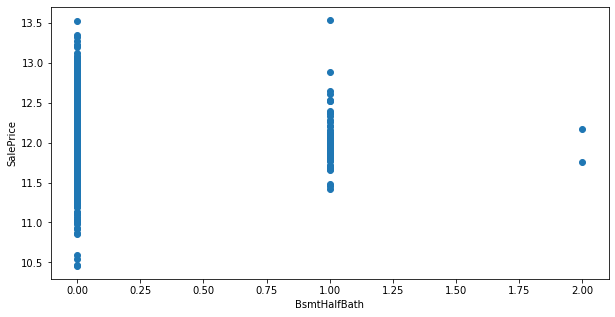

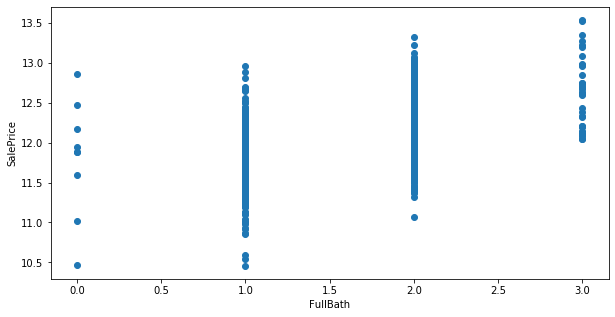

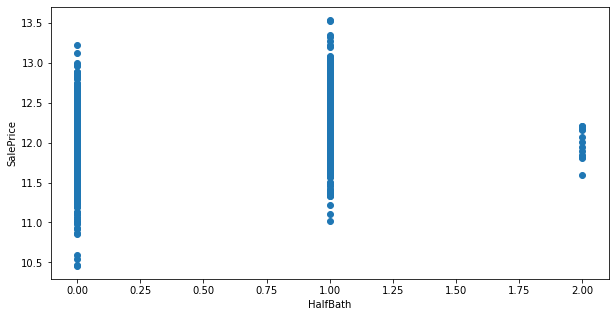

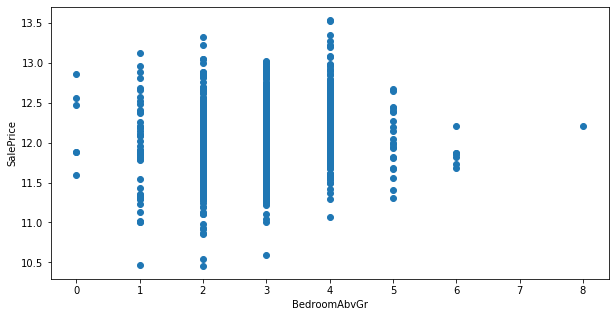

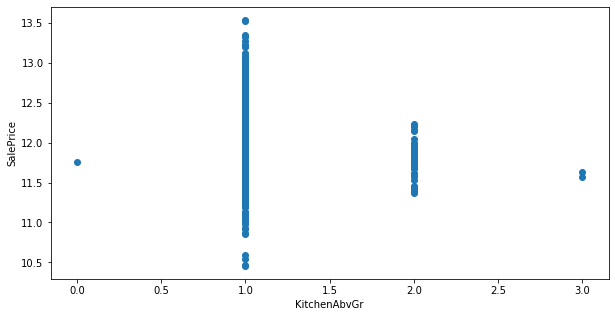

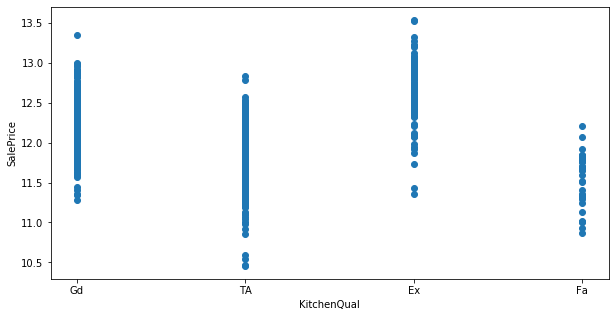

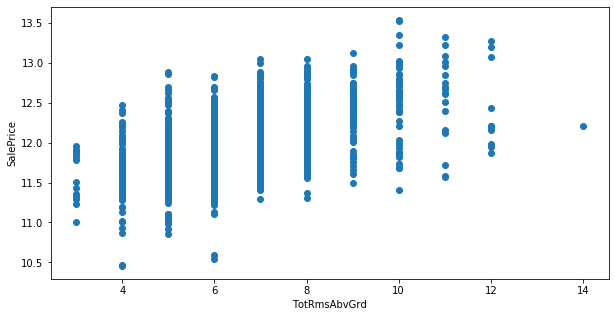

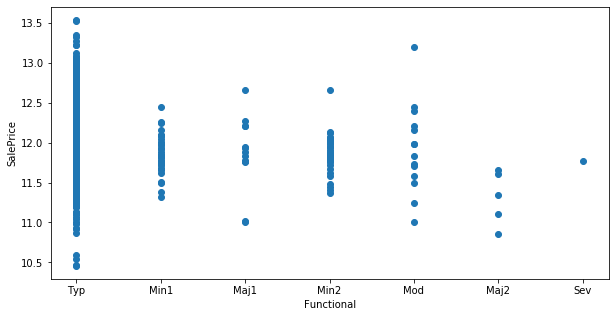

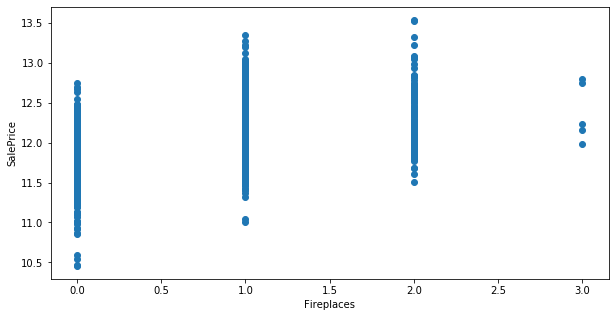

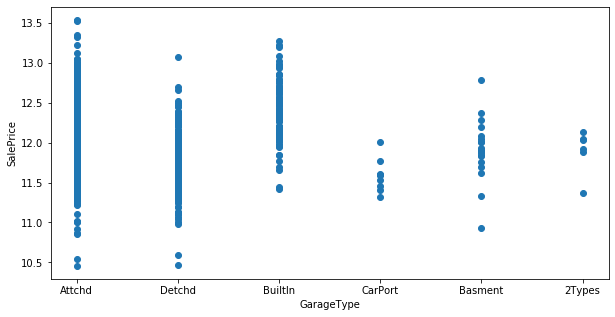

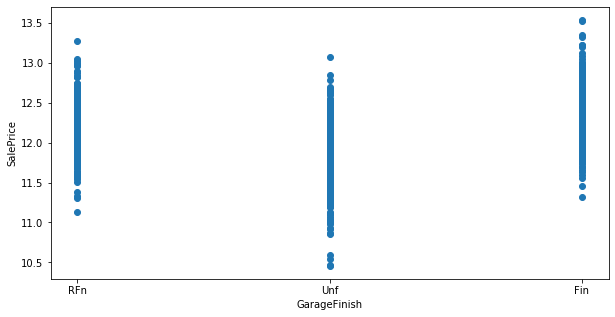

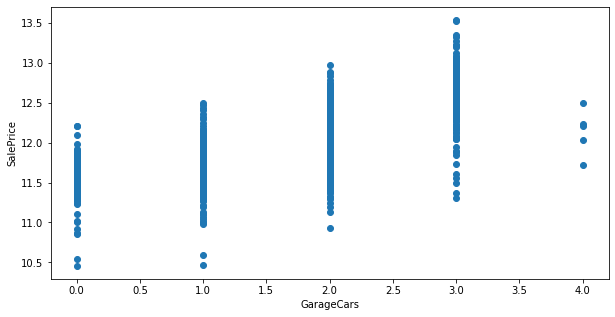

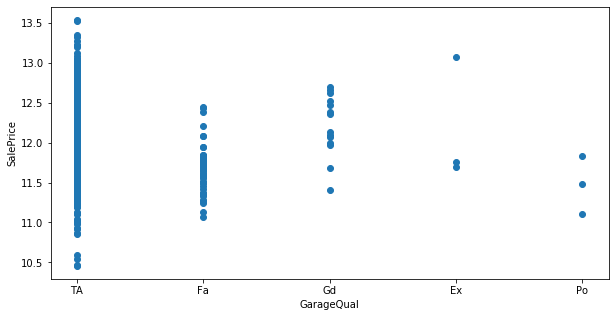

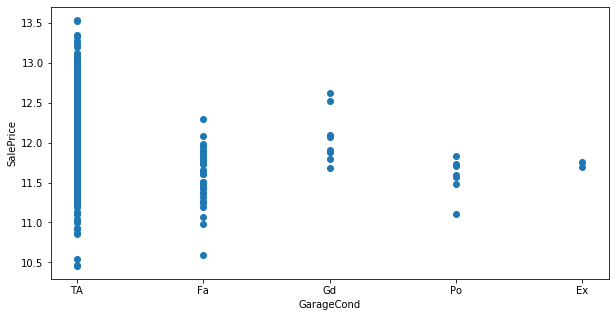

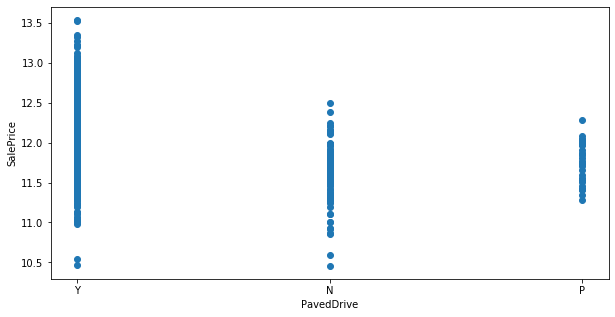

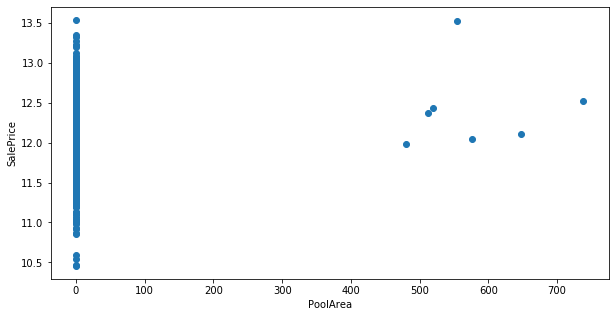

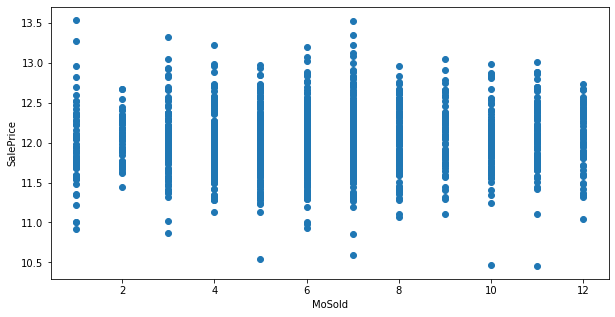

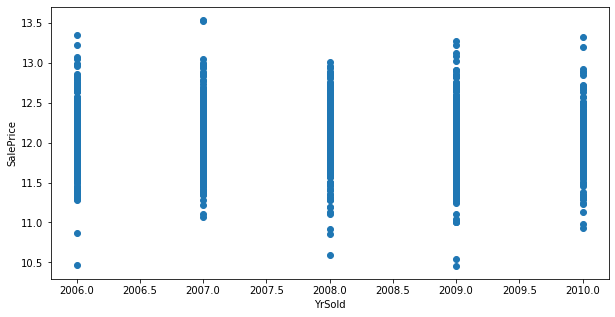

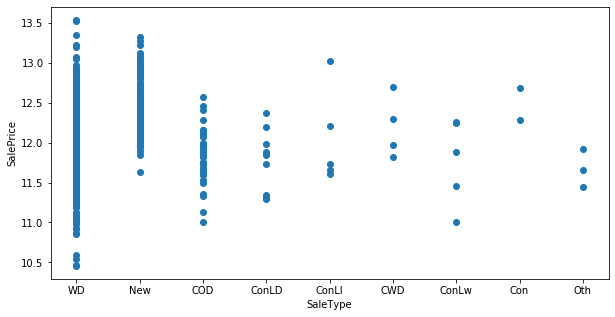

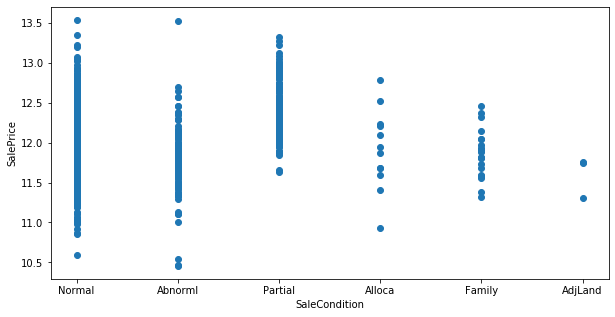

In [129]:
for col in range(0, home_categorical.shape[1]): 
    plt.figure(figsize=(10,5))
    plt.scatter(home_categorical.iloc[:, col], home_df["SalePrice"])
    plt.xlabel(home_categorical.columns[col])
    plt.ylabel("SalePrice")
    plt.show()

- <b><p style="color:blue"><p style="font-size:15px">Observation</b></p></p>

From the above graphs we can observe that for some of varibale 95 to 99 percent have a single value i.e has majority. So we are going to remove these columns.

<u><p style="color=brown"> Columns which seems to be unnecessary:</u></p>
    
    ['Street', 'Utilities', 'PoolArea']

In [130]:
categorical_index= ['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1','Condition2','BldgType','HouseStyle', 'OverallQual', 'OverallCond','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC','CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual','TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType','GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

print("Shape of DataFrame:", home_df.shape)
print()

home_df=home_df.drop(['Street', 'Utilities', 'PoolArea'], axis=1)

print("Shape of Datafram after removing the the columns:", home_df.shape)
print()

Shape of DataFrame: (1453, 75)

Shape of Datafram after removing the the columns: (1453, 72)



- <b>Checking the Numerical columns again</b>

In [131]:
# Numerica Columns

home_numeric = home_df.select_dtypes(include=[np.number])

print('List of Numerical Columns')
print(home_numeric.columns)

print("Shape of Numerical Dataframe")
print(home_numeric.shape)

List of Numerical Columns
Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'SalePrice'],
      dtype='object')
Shape of Numerical Dataframe
(1453, 22)


In [132]:
#Understanding the Numerical Columns

home_numeric.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,69.891259,10531.816242,1971.406745,1984.982794,103.993806,445.777013,46.773572,569.973159,1062.523744,1164.090158,347.590502,5.872677,1517.553338,1979.855471,475.258775,94.547144,46.781831,21.784584,3.426015,15.133517,41.289745,12.027862
std,22.066466,10001.901796,30.177193,20.592775,180.878681,456.152317,161.675202,441.167781,433.559312,385.712049,437.030774,48.738447,525.238359,24.748065,211.776294,125.450642,66.334841,60.893912,29.386956,55.881824,488.961892,0.395936
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,438.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.460242
25%,60.000000,7560.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,227.000000,796.000000,882.000000,0.000000,0.000000,1131.000000,1962.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.775290
50%,69.000000,9490.000000,1973.000000,1994.000000,0.000000,384.000000,0.000000,482.000000,992.000000,1088.000000,0.000000,0.000000,1466.000000,1984.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,12.004568
75%,79.000000,11616.000000,2001.000000,2004.000000,166.000000,714.000000,0.000000,810.000000,1300.000000,1392.000000,728.000000,0.000000,1779.000000,2003.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,12.273731
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,2010.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,15500.000000,13.534473


- <b><p style="color:blue"><p style="font-size:15px">Observation</b></p></p>

As we can see there are many variable which have exterem values. Their 25, 50 75 percentiles have zero values. Which basically means their are large number of outliers.

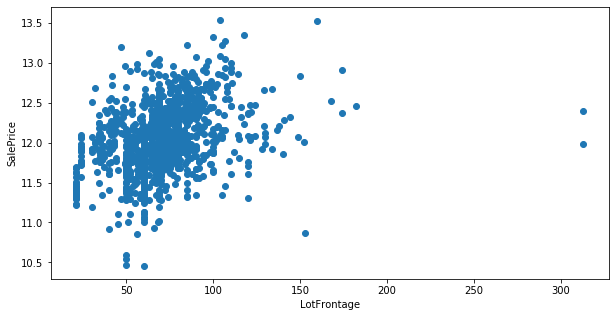

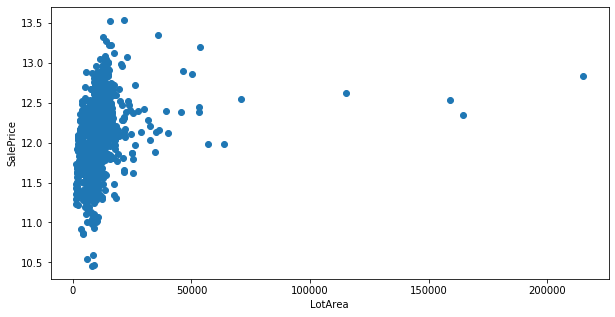

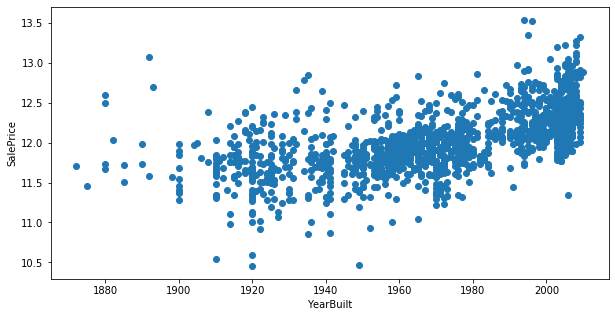

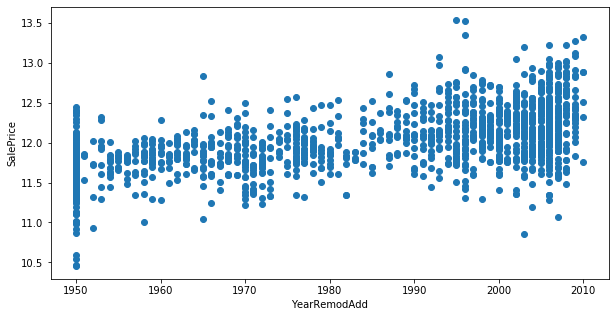

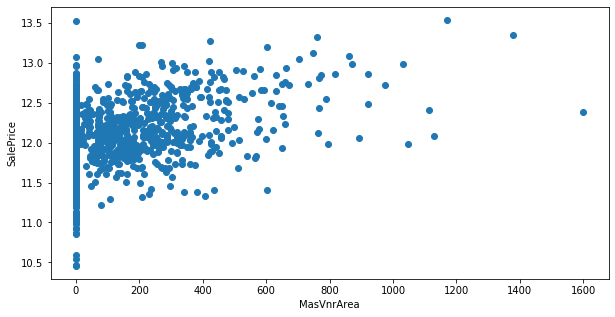

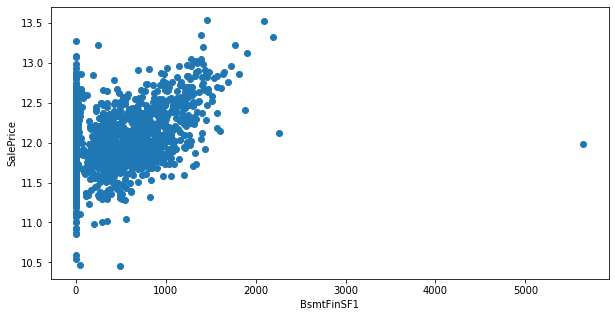

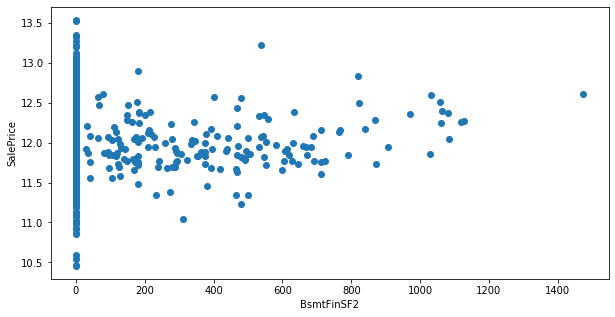

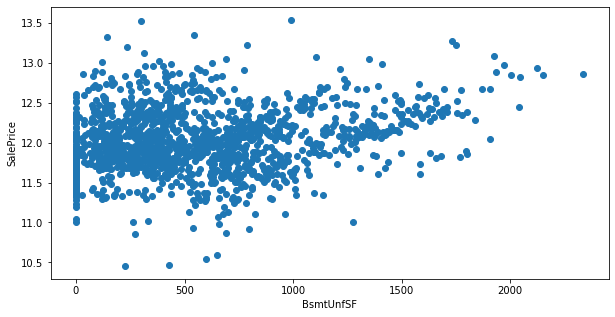

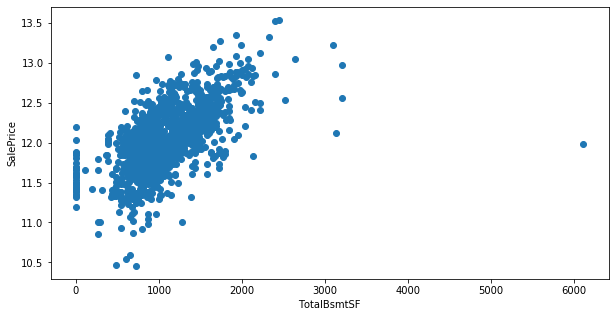

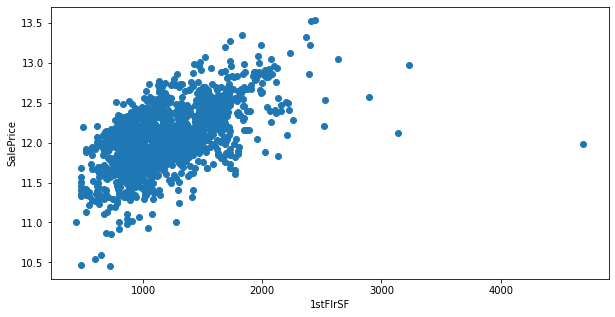

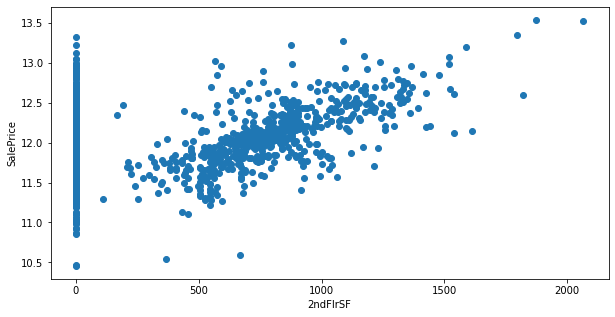

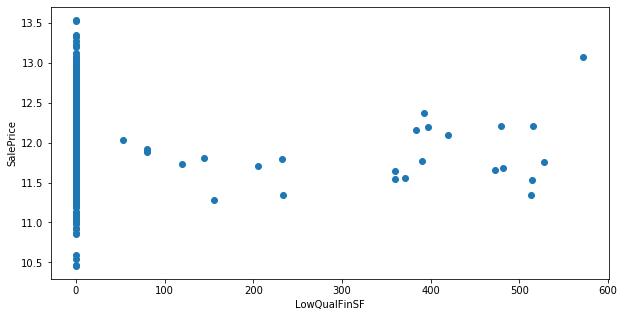

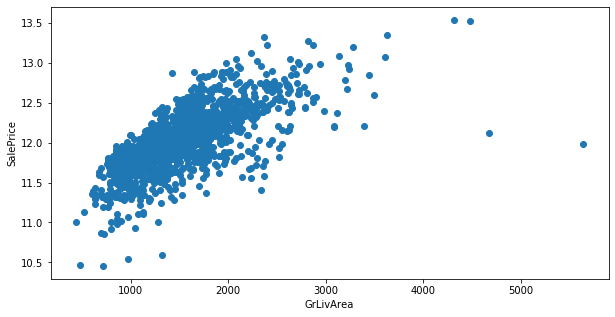

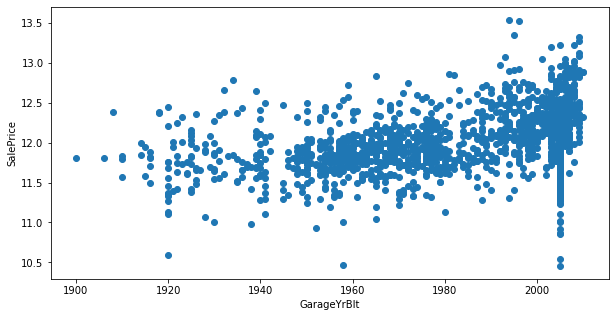

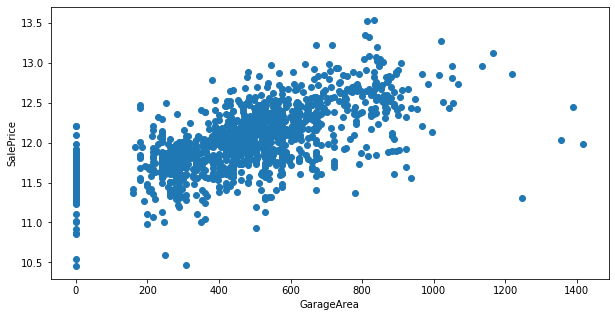

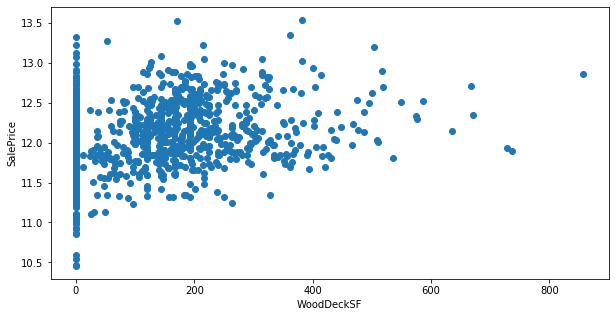

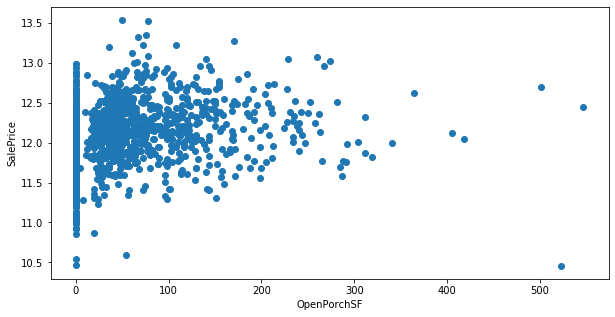

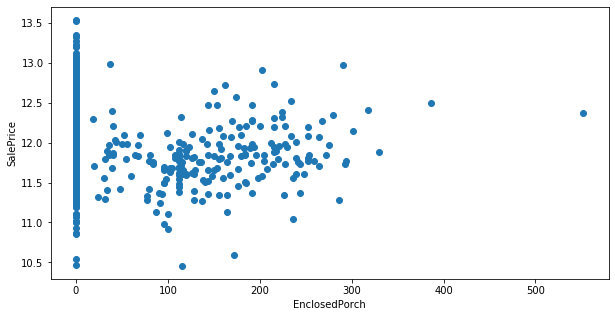

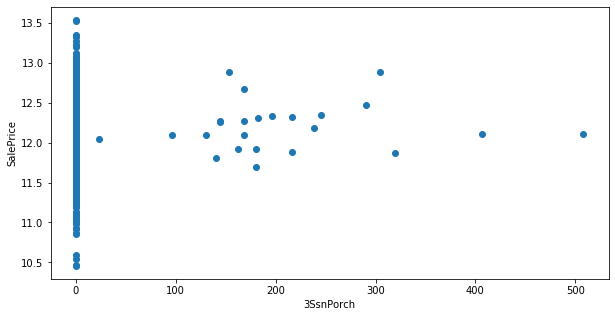

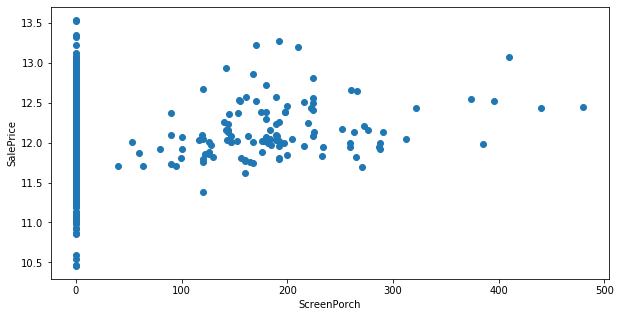

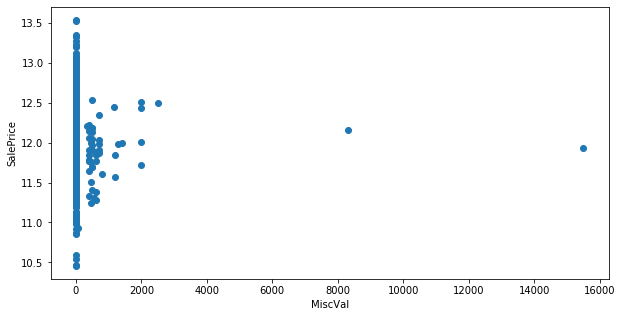

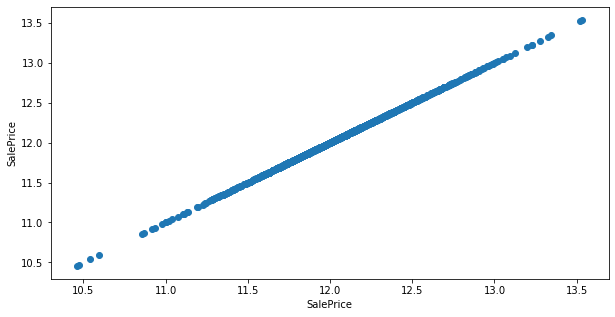

In [133]:
for col in range(0, home_numeric.shape[1]):
    plt.figure(figsize=(10,5))
    plt.scatter(home_numeric.iloc[:, col], home_df["SalePrice"])
    plt.xlabel(home_numeric.columns[col])
    plt.ylabel("SalePrice")
    plt.show()

##### Remoaving Outliers

In [134]:
# Removing the outliers as outliers affects the regression model

home_df = home_df[home_df['LotFrontage'] < 200]
home_df = home_df[home_df['LotArea'] < 100000]
home_df = home_df[home_df['MasVnrArea'] < 1200]
home_df = home_df[home_df['BsmtFinSF1'] < 3000]
home_df = home_df[home_df['BsmtFinSF2'] < 1200]
home_df = home_df[home_df['1stFlrSF'] < 4000]
home_df = home_df[home_df['GrLivArea'] < 4000]
home_df = home_df[home_df['GarageArea'] < 1200]
home_df = home_df[home_df['WoodDeckSF'] < 800]
home_df = home_df[home_df['OpenPorchSF'] < 400]
home_df = home_df[home_df['EnclosedPorch'] < 400]
home_df = home_df[home_df['ScreenPorch'] < 300]
home_df = home_df[home_df['TotalBsmtSF'] < 4000]
home_df = home_df[home_df['EnclosedPorch'] < 400]
home_df = home_df[home_df['MiscVal'] < 2000]

In [135]:
# Some columns has majority value as zero. So removing those columns.

home_df=home_df.drop(['3SsnPorch','LowQualFinSF'], axis=1)

- <u>Chekcing the Skewness of the Numerical Variable.</u>

In [136]:
home_numeric = home_df.select_dtypes(include=[np.number])
print("Skewnewss of the Variable are:")
for col in home_numeric:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(home_df[col].skew()) , 
          '   ' ,
          #'Kurtosis: {:06.2f}'.format(home_df[col].kurt())  
         )

Skewnewss of the Variable are:
LotFrontage     Skewness: 00.65    
LotArea         Skewness: 04.06    
YearBuilt       Skewness: -0.62    
YearRemodAdd    Skewness: -0.50    
MasVnrArea      Skewness: 02.31    
BsmtFinSF1      Skewness: 00.73    
BsmtFinSF2      Skewness: 04.13    
BsmtUnfSF       Skewness: 00.91    
TotalBsmtSF     Skewness: 00.56    
1stFlrSF        Skewness: 00.91    
2ndFlrSF        Skewness: 00.76    
GrLivArea       Skewness: 00.79    
GarageYrBlt     Skewness: -0.71    
GarageArea      Skewness: 00.02    
WoodDeckSF      Skewness: 01.44    
OpenPorchSF     Skewness: 01.79    
EnclosedPorch   Skewness: 02.87    
ScreenPorch     Skewness: 03.77    
MiscVal         Skewness: 07.94    
SalePrice       Skewness: 00.13    


### Data Correlation

- <u><p style="color:blue">Checking the correlation</u></p>

In [137]:
home_df.corr()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,SalePrice
LotFrontage,1.000000,0.393082,0.126765,0.071569,0.159369,0.118121,0.027622,0.153732,0.302597,0.347223,0.043654,0.301187,0.046071,0.303926,0.083048,0.124727,-0.007240,0.036214,0.006199,0.348492
LotArea,0.393082,1.000000,0.036817,0.019474,0.107546,0.173071,0.081474,0.050655,0.268655,0.350363,0.082603,0.335579,-0.036793,0.250757,0.188487,0.131988,-0.014466,0.096598,0.002225,0.347581
YearBuilt,0.126765,0.036817,1.000000,0.600397,0.310825,0.243775,-0.053808,0.152407,0.402313,0.283362,0.015174,0.211123,0.713859,0.494697,0.224821,0.241085,-0.391309,-0.035519,-0.069066,0.609894
YearRemodAdd,0.071569,0.019474,0.600397,1.000000,0.168565,0.116847,-0.066622,0.177278,0.290878,0.235879,0.135247,0.290056,0.588666,0.372933,0.207294,0.254693,-0.201610,-0.034777,-0.082826,0.570831
MasVnrArea,0.159369,0.107546,0.310825,0.168565,1.000000,0.221558,-0.072996,0.120927,0.337247,0.320958,0.146709,0.364724,0.211124,0.366424,0.151435,0.130755,-0.106913,0.049489,-0.051843,0.429219
BsmtFinSF1,0.118121,0.173071,0.243775,0.116847,0.221558,1.000000,-0.054482,-0.534078,0.449731,0.377390,-0.191349,0.109300,0.121564,0.258512,0.176835,0.087879,-0.111511,0.071208,-0.007345,0.372260
BsmtFinSF2,0.027622,0.081474,-0.053808,-0.066622,-0.072996,-0.054482,1.000000,-0.208454,0.097892,0.090472,-0.118703,-0.034825,-0.091189,-0.022538,0.074920,-0.022660,0.038739,0.074255,-0.027810,-0.013062
BsmtUnfSF,0.153732,0.050655,0.152407,0.177278,0.120927,-0.534078,-0.208454,1.000000,0.448390,0.343553,-0.002977,0.258829,0.181829,0.174464,0.005921,0.126492,0.007287,-0.016226,-0.059375,0.224271
TotalBsmtSF,0.302597,0.268655,0.402313,0.290878,0.337247,0.449731,0.097892,0.448390,1.000000,0.806659,-0.250151,0.384030,0.291409,0.453848,0.221328,0.221810,-0.094654,0.085696,-0.083124,0.631566
1stFlrSF,0.347223,0.350363,0.283362,0.235879,0.320958,0.377390,0.090472,0.343553,0.806659,1.000000,-0.267495,0.516248,0.191495,0.468774,0.223521,0.182139,-0.061766,0.089712,-0.055179,0.606275


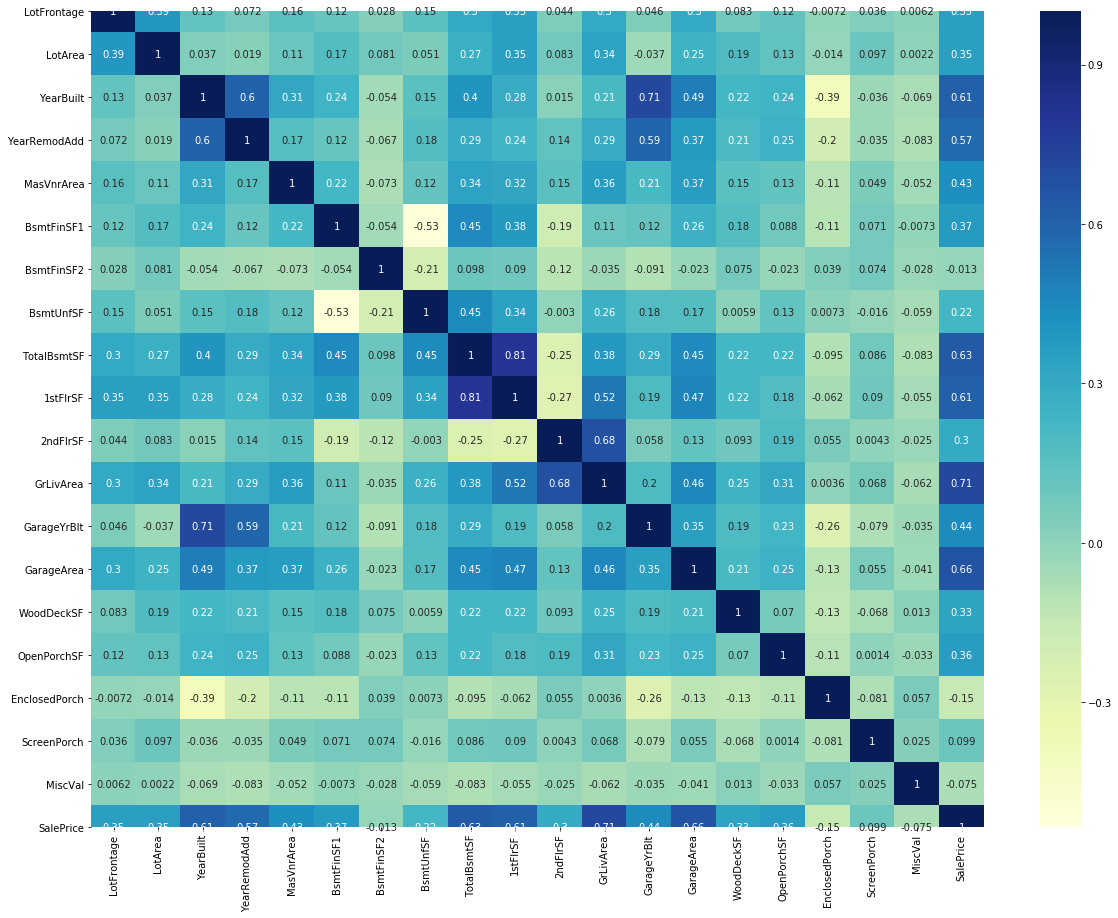

In [138]:
plt.figure(figsize=(20,15))

sns.heatmap(home_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

<b><p style="color:blue"><p style="font-size:15px">Observation</b></p></p>

- We can see that 'SalePrice' has very high positive correlation with some of the columns like 'GargeArea', 'GrLivArea', '1stFlrSF'.
- 'SalePrice' has also Negative correlation with some ot the varibale. But they are not affecting the 'SalePrice' that much

### Feature Engnineering

In [139]:
print('Shape of Dataframe:')
print(home_df.shape)

print('List of columns in the Dataframe')
print(home_df.columns)

Shape of Dataframe:
(1419, 70)
List of columns in the Dataframe
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeck

- <b><u>Categorical Columns</b></u>

['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1','Condition2','BldgType','HouseStyle', 'OverallQual', 'OverallCond','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC','CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual','TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType','GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

- <b><u>Numerical Columns</b></u>

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF','2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea','WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch','ScreenPorch', 'MiscVal', 'SalePrice']

- <b><u> Iputing the dummy vairble and dropping the original cloumns</b></u>

In [140]:
# convert into dummies

#home_dummies = pd.get_dummies(home_categorical, columns=categorical_index, prefix=categorical_index, drop_first=True)
home = pd.get_dummies(home_df, columns=categorical_index, prefix=categorical_index, drop_first=True)
home.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_

In [141]:
home.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_

In [142]:
print('List of columns in Dataframae')
print(home.columns)

print('Shape of the DataFrame')
print(home.shape)

List of columns in Dataframae
Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=292)
Shape of the DataFrame
(1419, 292)


home.to_csv('home.csv', encoding='utf-8', index=False)

In [143]:
y= home.pop('SalePrice')
X= home

## Model Building

- Splitting into training and test dataset

In [144]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

#df_train, df_test = train_test_split(home, train_size = 0.7, test_size = 0.3, random_state = 100)

- <u>Scaling the features using Standard Scaler</u>

In [145]:
#scaler = MinMaxScaler()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

### LinearRegression Model

In [146]:
# LinearRegression Model

#from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_train_pred = lrm.predict(X_train)
print('r2_score of trianing data:', r2_score(y_true=y_train, y_pred=y_train_pred))
print('RMSE of test data',mean_squared_error(y_train, y_train_pred))

y_test_pred = lrm.predict(X_test)
print('\nr2_score of test data:', r2_score(y_true=y_test, y_pred=y_test_pred))
print('RMSE of test data',mean_squared_error(y_test, y_test_pred))

r2_score of trianing data: 0.9581146000063806
RMSE of test data 0.006292893001617459

r2_score of test data: 0.8871549627577707
RMSE of test data 0.016493084542923902


<b>Observation</b>

There is almost 6 to 7 percent difference in the r2_score of the training and test data and almost 1 percent difference in the RMSE values.



====> Let's observe the curve to see how accurate it is predicting===>>

- <b> Training Dataset Curve</b> ===>

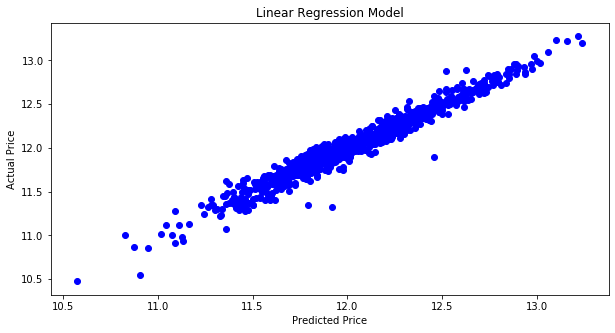

In [148]:
# Plotting curve Train Data Actual value and the predicted value.

plt.figure(figsize=(10,5))
plt.scatter(y_train_pred, y_train, color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

- <b> Test Dataset Curve</b> ===>

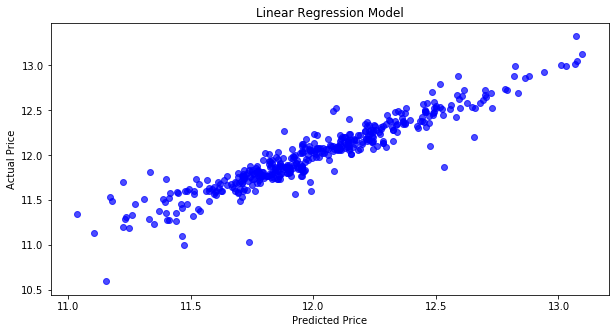

In [149]:
# Plotting curve Test Data Actual value and the predicted value.

plt.figure(figsize=(10,5))
plt.scatter(y_test_pred, y_test, alpha=.7, color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

<p style="font-family:Courier New"><p style="font-size:20px"><b> >> <u> Conclusion </u>: </b></p></p>

From the graph we can conclude that the model is working fine as it is almost predicting close the accurate value. 

Now We are going to use Advance Regression Ridge and Lasso Regression and we are going to see the behaviour-

In [150]:
# grid search CV
from sklearn.model_selection import KFold

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.001, 0.01, 0.1,  1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 500, 1000]}



### Ridge Regression Model

In [151]:
ridge = Ridge()

# cross validation
ridge_model = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    2.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200,
                                   500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [152]:
cv_results = pd.DataFrame(ridge_model.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013522,0.002689,0.000998,0.001262,0.001,{'alpha': 0.001},-0.095415,-0.098575,-0.078878,-0.100247,-0.102958,-0.095202,0.008530,17,-0.052741,-0.053733,-0.055138,-0.053181,-0.053657,-0.053690,0.000807
1,0.012495,0.006248,0.000000,0.000000,0.01,{'alpha': 0.01},-0.094900,-0.096434,-0.078594,-0.099599,-0.101727,-0.094238,0.008186,16,-0.052813,-0.053746,-0.055137,-0.053221,-0.053705,-0.053724,0.000785
2,0.011820,0.006395,0.004724,0.005487,0.1,{'alpha': 0.1},-0.091685,-0.090500,-0.076795,-0.095256,-0.096810,-0.090198,0.007091,14,-0.053264,-0.054070,-0.055254,-0.053655,-0.054017,-0.054052,0.000667
3,0.016593,0.002155,0.002399,0.000492,1,{'alpha': 1.0},-0.083008,-0.082421,-0.072831,-0.084653,-0.088187,-0.082212,0.005107,11,-0.056092,-0.055950,-0.057786,-0.056205,-0.055875,-0.056382,0.000711
4,0.015192,0.000748,0.002598,0.000489,2,{'alpha': 2.0},-0.080826,-0.079643,-0.071798,-0.082292,-0.086135,-0.080131,0.004710,10,-0.057705,-0.057222,-0.059282,-0.057671,-0.056743,-0.057725,0.000854
5,0.013393,0.001496,0.002598,0.001199,3,{'alpha': 3.0},-0.079461,-0.078467,-0.070938,-0.081575,-0.085544,-0.079188,0.004791,8,-0.058811,-0.058210,-0.060351,-0.058725,-0.057417,-0.058703,0.000962
6,0.013200,0.001170,0.001796,0.000399,4,{'alpha': 4.0},-0.078516,-0.078042,-0.070228,-0.081222,-0.085323,-0.078657,0.004949,7,-0.059658,-0.059120,-0.061235,-0.059622,-0.058018,-0.059531,0.001038
7,0.011799,0.001834,0.002002,0.000009,5,{'alpha': 5.0},-0.077817,-0.077863,-0.069735,-0.080983,-0.085266,-0.078323,0.005089,6,-0.060418,-0.059900,-0.062042,-0.060379,-0.058599,-0.060268,0.001105
8,0.011597,0.001625,0.001996,0.000004,6,{'alpha': 6.0},-0.077304,-0.077821,-0.069373,-0.080811,-0.085361,-0.078124,0.005233,5,-0.061112,-0.060620,-0.062742,-0.061041,-0.059165,-0.060936,0.001144
9,0.015793,0.001327,0.002401,0.000487,7,{'alpha': 7.0},-0.076977,-0.077854,-0.069161,-0.080698,-0.085509,-0.078030,0.005344,3,-0.061764,-0.061276,-0.063356,-0.061643,-0.059690,-0.061546,0.001171


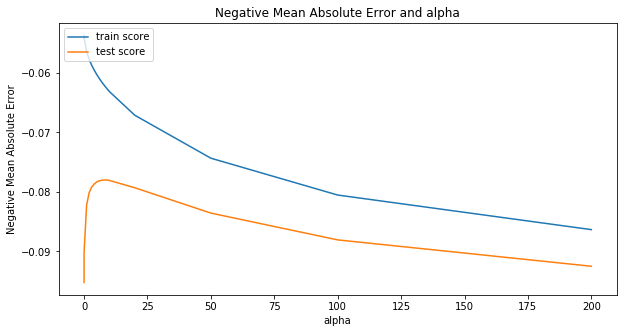

In [153]:
plt.figure(figsize=(10,5))

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

<b><p style="color:blue"><p style="font-size:20px">Observation</b></p></p>

As we can observe from the previous result table and from the graph that as we are increasing the values of alpha the mean score of traing and test data is coming close to each other.

Optimum aplha value: 8, 9, 10.

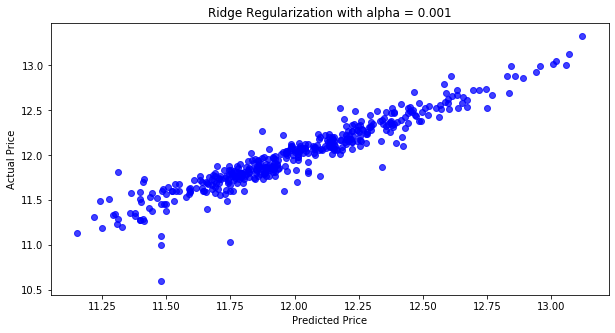

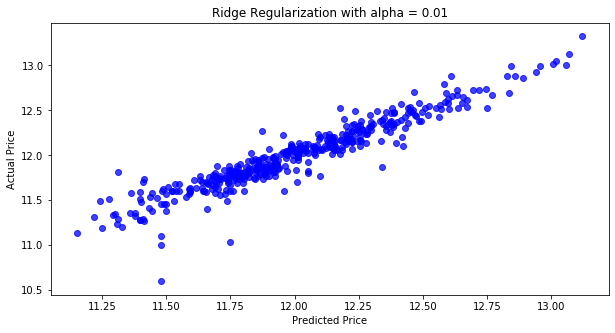

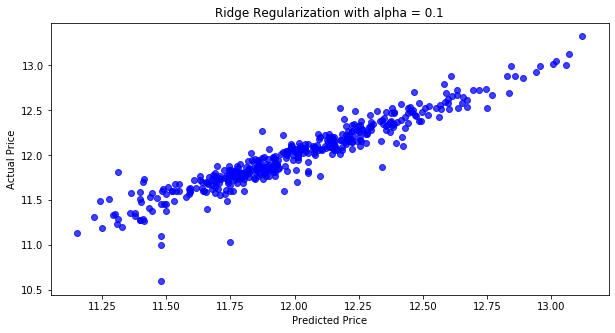

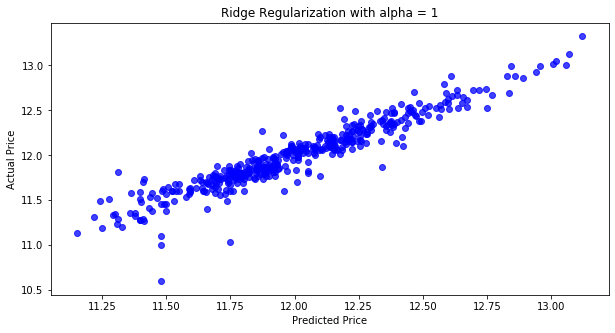

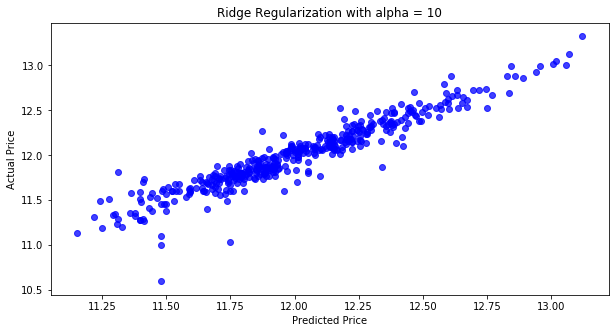

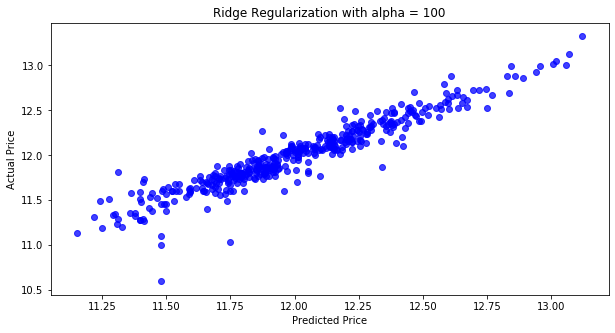

In [154]:
for i in range (-3, 3):
    alpha = 10**i
    y_test_pred = ridge_model.predict(X_test)
    
    
    plt.figure(figsize=(10,5))
    plt.scatter(y_test_pred, y_test, alpha=.75, color='b')
    
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    
    #overlay = 'R^2 is: {}\nRMSE is: {}'.format(ridge_model.score(X_test, y_test), mean_squared_error(y_test, y_test_pred)) 
    #plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

<b><p style="color:blue"><p style="font-size:20px">Observation</b></p></p>

From the above graphs for different value of alpha, we can observe that as we are increasing the value of alpha the variance is decreasing and it is giving more and more accurate value.

<u><p style="font-size:18px">Finding the best <b>alpha value</b> for <b>Ridge Regression</b></p></u>

In [155]:
from sklearn.linear_model import RidgeCV
from sklearn.datasets import make_regression

reg = RidgeCV()
reg.fit(X_train, y_train)
print("Best alpha using built-in RidgeCV: %f" % reg.alpha_)
print("Best score using built-in RidgeCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X_train.columns)

Best alpha using built-in RidgeCV: 10.000000
Best score using built-in RidgeCV: 0.932299


Text(0.5, 1.0, 'Feature importance using Ridge Model')

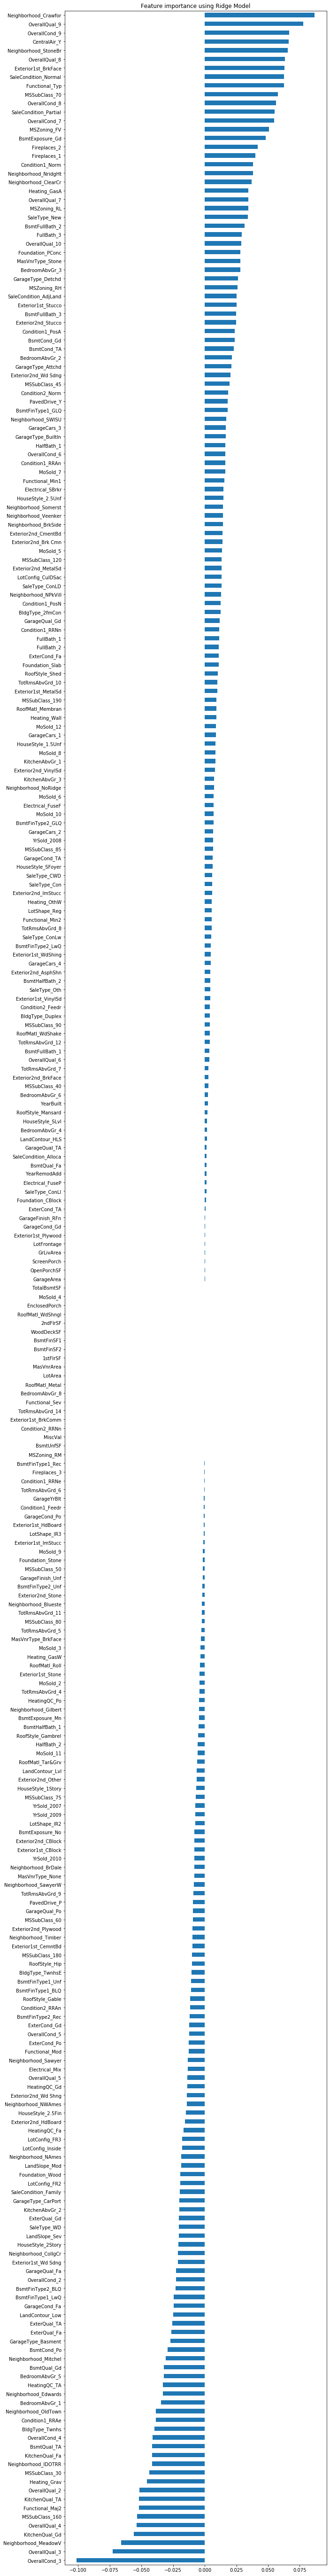

In [156]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 100)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")

- <p style="color:blue"><b>Ridge Regression Cofficents</b></p>

In [157]:
# Ridge regression
rm = Ridge(alpha=10)
rm.fit(X_train, y_train)

# predict
y_train_pred = rm.predict(X_train)
print('r2_score of train data:',r2_score(y_true=y_train, y_pred=y_train_pred))
print('RMSse of train data:',mean_squared_error(y_train, y_train_pred))

y_test_pred = rm.predict(X_test)
print('\nr2_score of test data',r2_score(y_true=y_test, y_pred=y_test_pred))
print('RMSE of test data',mean_squared_error(y_test, y_test_pred))

r2_score of train data: 0.9462178075216218
RMSse of train data: 0.00808027576937039

r2_score of test data 0.8988679854971594
RMSE of test data 0.014781145063660447


In [158]:
# Ridge model parameters
model_parameters = list(rm.coef_)
model_parameters.insert(0, rm.intercept_)
model_parameters = [round(x, 5) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 5.03605),
 ('LotFrontage', 0.00027),
 ('LotArea', 0.0),
 ('YearBuilt', 0.00242),
 ('YearRemodAdd', 0.00132),
 ('MasVnrArea', 1e-05),
 ('BsmtFinSF1', 7e-05),
 ('BsmtFinSF2', 6e-05),
 ('BsmtUnfSF', -1e-05),
 ('TotalBsmtSF', 0.00012),
 ('1stFlrSF', 5e-05),
 ('2ndFlrSF', 0.0001),
 ('GrLivArea', 0.0002),
 ('GarageYrBlt', -0.00073),
 ('GarageArea', 0.00018),
 ('WoodDeckSF', 9e-05),
 ('OpenPorchSF', 0.00019),
 ('EnclosedPorch', 0.0001),
 ('ScreenPorch', 0.00019),
 ('MiscVal', -0.0),
 ('MSSubClass_30', -0.04376),
 ('MSSubClass_40', 0.00288),
 ('MSSubClass_45', 0.01955),
 ('MSSubClass_50', -0.00167),
 ('MSSubClass_60', -0.00938),
 ('MSSubClass_70', 0.05763),
 ('MSSubClass_75', -0.007),
 ('MSSubClass_80', -0.00239),
 ('MSSubClass_85', 0.00651),
 ('MSSubClass_90', 0.00413),
 ('MSSubClass_120', 0.0134),
 ('MSSubClass_160', -0.05347),
 ('MSSubClass_180', -0.01),
 ('MSSubClass_190', 0.00933),
 ('MSZoning_FV', 0.0509),
 ('MSZoning_RH', 0.02583),
 ('MSZoning_RL', 0.03428),
 ('MSZoning_RM

====>> <b>Cofficeints for Different values of alpha:</b> ==>

In [159]:
rm = Ridge(alpha=1)
rm.fit(X_train, y_train)

# predict
y_train_pred = rm.predict(X_train)
print(rm.coef_)
print(rm.intercept_)

[ 2.23413215e-04  4.60026001e-06  2.31137306e-03  8.02502051e-04
 -3.36515628e-06  5.65093176e-05  4.66762492e-05 -3.28883240e-06
  9.98966894e-05 -3.84620054e-05  3.29703219e-06  2.81518739e-04
 -4.79324399e-04  1.58183317e-04  8.64690755e-05  1.45285188e-04
  8.67564983e-05  1.65243660e-04 -2.02367726e-06 -4.22420267e-02
 -2.34356106e-02  5.93998342e-02  9.04950160e-03  5.38620180e-03
  7.65071558e-02 -3.44258066e-02 -3.47811918e-03  1.13287925e-02
 -1.24178370e-03 -2.64820156e-03 -5.54125763e-02 -6.87722726e-03
 -3.27592465e-03  1.67397636e-01  1.21181847e-01  1.19393476e-01
  1.05624557e-01 -3.12233991e-03  1.29845798e-02  9.26571229e-03
 -2.02148711e-02 -3.31648445e-02 -7.60844874e-03  1.51744756e-02
 -3.45789665e-02 -9.07539090e-02 -2.55246343e-02 -2.04142285e-02
 -5.00482551e-02 -1.78241077e-02 -2.72812670e-02 -4.99864238e-04
  7.08808795e-02 -2.65749883e-02  1.09989531e-01 -5.23303589e-02
 -4.43069784e-03 -6.43061449e-02 -1.45085810e-01 -4.28860395e-02
 -3.26838160e-02  2.13067

In [160]:
rm = Ridge(alpha=10)
rm.fit(X_train, y_train)

# predict
y_train_pred = rm.predict(X_train)
print(rm.coef_)
print(rm.intercept_)

[ 2.69776421e-04  4.90729917e-06  2.42443925e-03  1.32486257e-03
  5.77614467e-06  6.58447531e-05  6.24751438e-05 -5.61130272e-06
  1.22708588e-04  5.08659146e-05  9.60930866e-05  2.03026661e-04
 -7.31174027e-04  1.84590351e-04  9.28866169e-05  1.87112258e-04
  1.04051318e-04  1.88534441e-04 -6.18220685e-07 -4.37609042e-02
  2.87647117e-03  1.95480708e-02 -1.67151610e-03 -9.37675124e-03
  5.76279841e-02 -7.00095718e-03 -2.38600611e-03  6.51298524e-03
  4.12602372e-03  1.34027580e-02 -5.34729604e-02 -9.99770438e-03
  9.32846830e-03  5.09018234e-02  2.58287546e-02  3.42827073e-02
 -1.58392509e-04 -7.63962564e-03 -9.08055324e-04  5.48482860e-03
  1.75337380e-03 -2.47369541e-02 -6.20562381e-03  1.31959674e-02
 -1.94526246e-02 -1.78228422e-02 -1.79714512e-02 -1.87558785e-02
 -2.03697123e-02 -2.30074780e-03 -8.34937516e-03  1.42678585e-02
  3.71260124e-02 -2.12322646e-02  8.68642332e-02 -3.31018791e-02
 -4.47190368e-03 -4.17453743e-02 -6.59157602e-02 -3.09379847e-02
 -1.85727461e-02  1.29019

In [161]:
rm = Ridge(alpha=100)
rm.fit(X_train, y_train)

# predict
y_train_pred = rm.predict(X_train)
print(rm.coef_)
print(rm.intercept_)

[ 4.34189913e-04  4.78852254e-06  2.67048605e-03  2.48079763e-03
  3.19063852e-05  8.69083223e-05  6.35556957e-05  2.36367851e-06
  1.52827696e-04  1.23702947e-04  1.72672544e-04  1.52536749e-04
 -1.13251224e-03  2.36825396e-04  9.63496552e-05  2.42765148e-04
  1.19568624e-04  2.52228109e-04  2.90970904e-06 -1.83846411e-02
  1.53609187e-03  5.40980413e-03  3.01913488e-03 -6.98217466e-03
  2.32339082e-02 -4.77252455e-04  1.57053780e-03  1.23220107e-03
 -4.66726027e-03  1.00608398e-02 -1.84858904e-02 -3.54529752e-03
  3.90000558e-03  1.21693663e-02  3.14363865e-03  1.94615014e-02
 -1.77843774e-02 -3.89630531e-03 -1.62784007e-03 -2.70984573e-03
  1.02655287e-02 -7.98222024e-03 -7.13366389e-03  2.90062964e-03
 -3.39033130e-03 -1.13353194e-03 -7.98628491e-03 -2.12407363e-03
 -4.13345771e-03 -3.58684556e-04 -4.34123744e-03  9.27643001e-03
  4.59223806e-03 -1.12957995e-02  3.32891626e-02 -1.18975605e-02
 -5.83041243e-04 -1.21838689e-02 -1.48789696e-02 -9.81967702e-03
 -9.32438219e-04  1.97175

### Lasso Regression Model

In [162]:
# lasso model
lasso = Lasso()
lasso_model = GridSearchCV(estimator = lasso, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
lasso_model.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    5.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200,
                                   500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [163]:
cv_results = pd.DataFrame(lasso_model.cv_results_)
cv_results.head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.400795,0.202116,0.002997,1.094103e-03,0.001,{'alpha': 0.001},0.919594,0.893795,9.271289e-01,0.910477,0.905169,0.911240,0.011534,1,0.933086,0.936265,0.932187,0.934521,0.936934,0.934599,0.001808
1,0.108938,0.009752,0.002997,8.583069e-07,0.01,{'alpha': 0.01},0.863666,0.834071,8.674233e-01,0.854567,0.854098,0.854766,0.011572,2,0.860497,0.866333,0.861850,0.863612,0.863312,0.863121,0.001954
2,0.057368,0.019397,0.002599,7.987024e-04,0.1,{'alpha': 0.1},0.861559,0.832683,8.659159e-01,0.853529,0.850516,0.852842,0.011493,3,0.858203,0.864396,0.858642,0.861292,0.861567,0.860820,0.002244
3,0.036780,0.004953,0.002598,4.896099e-04,1,{'alpha': 1.0},0.859382,0.782590,8.368386e-01,0.835900,0.822115,0.827362,0.025401,4,0.832153,0.837600,0.832629,0.834102,0.835707,0.834438,0.002011
4,0.026985,0.003161,0.003798,9.793750e-04,2,{'alpha': 2.0},0.832011,0.716625,7.862531e-01,0.799039,0.788474,0.784462,0.037703,5,0.784975,0.799963,0.791007,0.791080,0.795749,0.792555,0.005042
5,0.023586,0.002799,0.002599,4.904469e-04,3,{'alpha': 3.0},0.806610,0.687845,7.561529e-01,0.776194,0.768468,0.759027,0.039336,6,0.754020,0.782120,0.767520,0.764756,0.767219,0.767127,0.008971
6,0.020388,0.002415,0.002997,1.094931e-03,4,{'alpha': 4.0},0.800062,0.684800,7.501769e-01,0.773156,0.766491,0.754907,0.038617,7,0.749519,0.779042,0.763608,0.760107,0.762289,0.762913,0.009469
7,0.018791,0.002786,0.002798,7.451836e-04,5,{'alpha': 5.0},0.795050,0.683188,7.461470e-01,0.771337,0.765577,0.752227,0.037927,8,0.746936,0.776509,0.761152,0.757412,0.759453,0.760292,0.009498
8,0.019589,0.002415,0.003197,9.796670e-04,6,{'alpha': 6.0},0.789464,0.680796,7.415177e-01,0.769303,0.764040,0.748988,0.037401,9,0.743779,0.773414,0.758148,0.754404,0.756083,0.757166,0.009518
9,0.018389,0.001356,0.002598,7.989056e-04,7,{'alpha': 7.0},0.783303,0.677618,7.362898e-01,0.766892,0.761824,0.745147,0.037028,10,0.740049,0.769756,0.754597,0.750850,0.752099,0.753470,0.009543


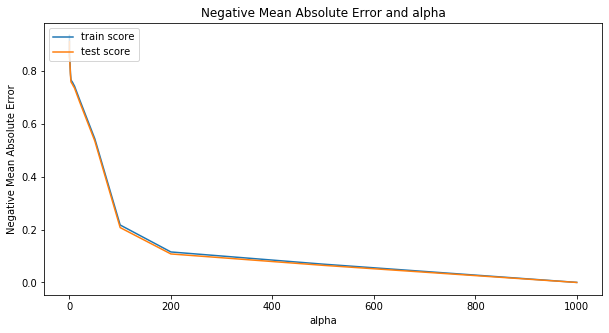

In [164]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(10,5))

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

<b><p style="color:blue"><p style="font-size:20px">Observation</b></p></p>

As we can observe from the previous result table and from the graph that the mean test and train score value is almost equal for all values of alpha and as we are increasing the values of alpha the mean score of traing and test data is tending to zero.

Optimal Value of Alpha seems to be 0.1 and 1.


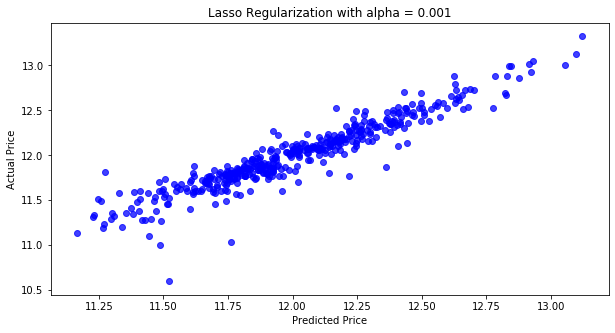

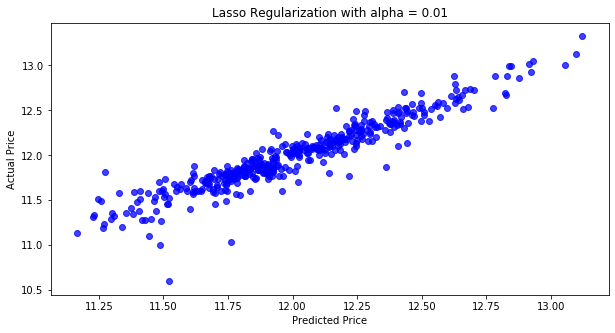

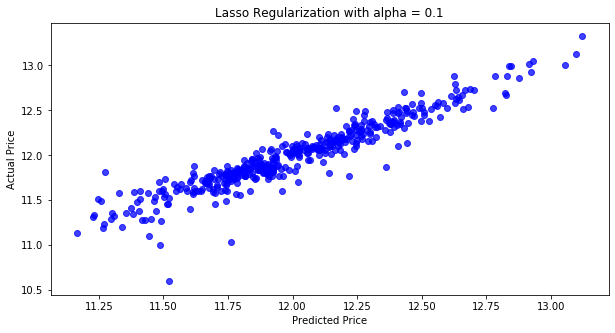

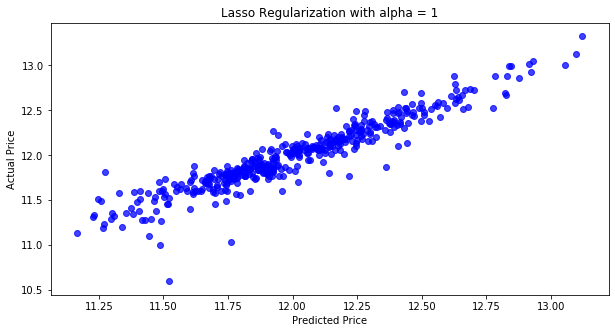

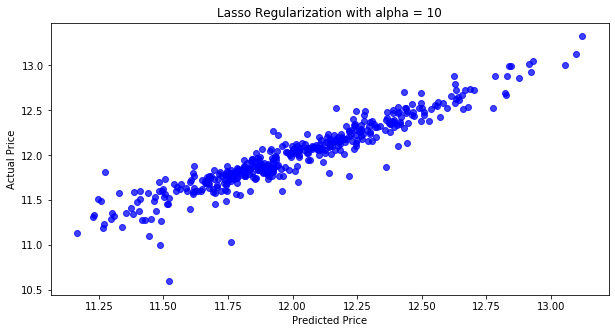

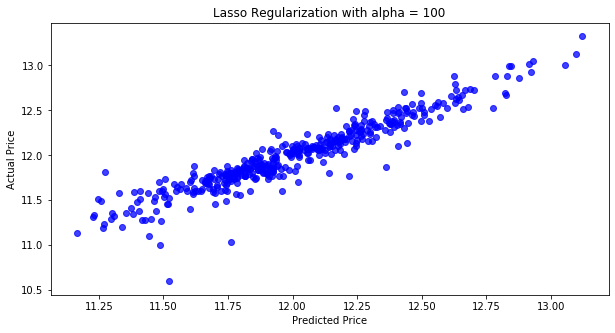

In [165]:
for i in range (-3, 3):
    alpha = 10**i
    y_lasso_pred = lasso_model.predict(X_test)

    plt.figure(figsize=(10,5))
    plt.scatter(y_lasso_pred, y_test, alpha=.75, color='b')
    #sns.regplot(y_lasso_pred, y_test)
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Lasso Regularization with alpha = {}'.format(alpha))
    #overlay = 'R^2 is: {}\nRMSE is: {}'.format(lasso_model.score(X_test, y_test),mean_squared_error(y_test, y_lasso_pred))
    #plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

<b><p style="color:blue"><p style="font-size:20px">Observation</b></p></p>

Graphs for difference value of alpha shows that as we are incresing the value of alpha it is no very much affecting the result  but variance is decreasing. It is becoming les bias.

- Now checking the coffiecinets for different value sof alpha:

<u><p style="font-size:18px">Finding the best <b>alpha value</b> for <b>Lasso Regression</b></p></u>

### <u>Feature Selection</u>

In [166]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression

reg = LassoCV()
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X_train.columns)

Best alpha using built-in LassoCV: 0.753838
Best score using built-in LassoCV: 0.827430


Text(0.5, 1.0, 'Feature importance using Lasso Model')

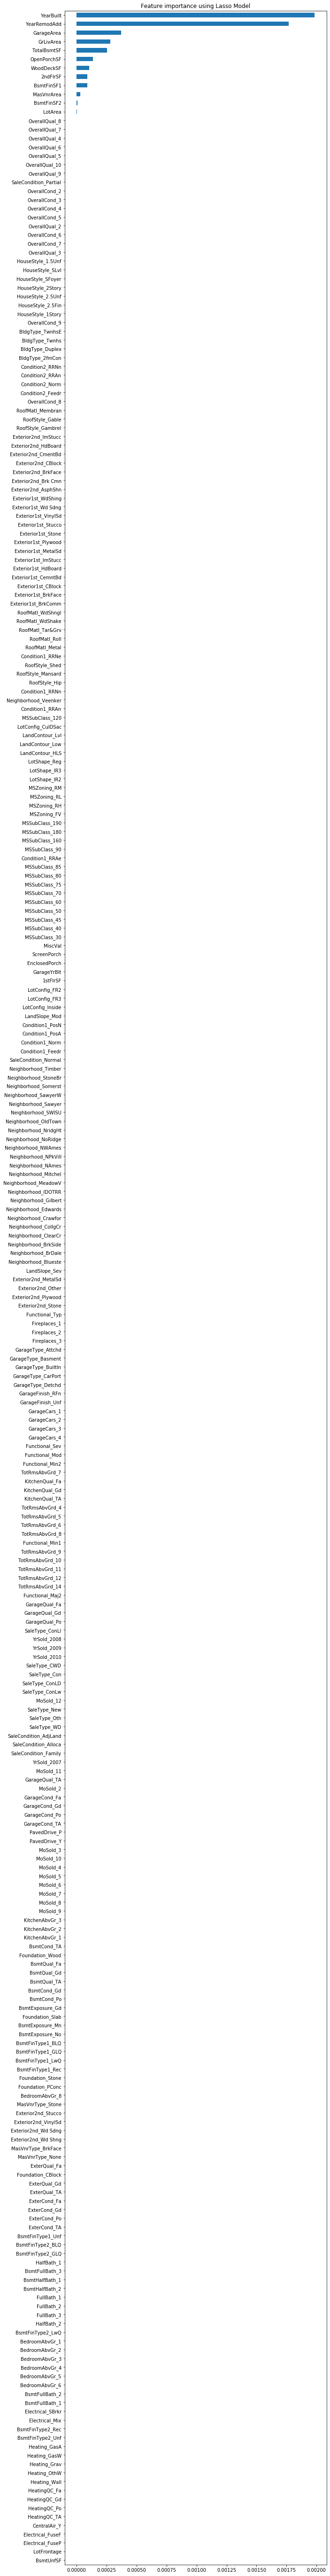

In [167]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 100)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

<b><p style="color:blue"><p style="font-size:20px">Observation</b></p></p>


From Above graph we can clearly see that Lasso Regression is giving importance to cetain features only and for rest other fetatures Lasso Regression Cofficents is zero.


<b><p style="color:green"> Feature_selection</p></b>: (alpha=1)

Accoding to lasso regression only <b>['YearBuilt', 'YearremodAdd', 'GarageArea', 'GrLivArea', 'TotalBsmtSF', 'OpenPorchSF', 'WoodDeckSF', '2ndFlrSF', 'BsmtFinSF1', 'MasvnrArea', 'BsmtFinSF2', 'LotArea']</b> are import to determint the SalePrice of home. Rest other features are not important.

- <p style="color:blue"><b>Lasso Regression Cofficents</b></p>

In [168]:
# lasso regression
lm = Lasso(alpha=1)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print('r2_score of train data:',r2_score(y_true=y_train, y_pred=y_train_pred))
print('RMSse of train data:',mean_squared_error(y_train, y_train_pred))

y_test_pred = lm.predict(X_test)
print('\nr2_score of test data',r2_score(y_true=y_test, y_pred=y_test_pred))
print('RMSE of test data',mean_squared_error(y_test, y_test_pred))

r2_score of train data: 0.8339619959856102
RMSse of train data: 0.02494567065430567

r2_score of test data 0.7815549137093605
RMSE of test data 0.031927263832117914


In [169]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 5) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 4.98625),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('YearBuilt', 0.00185),
 ('YearRemodAdd', 0.0012),
 ('MasVnrArea', 2e-05),
 ('BsmtFinSF1', 9e-05),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.00026),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 9e-05),
 ('GrLivArea', 0.00028),
 ('GarageYrBlt', 0.0),
 ('GarageArea', 0.00039),
 ('WoodDeckSF', 0.00011),
 ('OpenPorchSF', 0.0001),
 ('EnclosedPorch', -0.0),
 ('ScreenPorch', 0.0),
 ('MiscVal', -0.0),
 ('MSSubClass_30', -0.0),
 ('MSSubClass_40', 0.0),
 ('MSSubClass_45', 0.0),
 ('MSSubClass_50', -0.0),
 ('MSSubClass_60', 0.0),
 ('MSSubClass_70', 0.0),
 ('MSSubClass_75', -0.0),
 ('MSSubClass_80', 0.0),
 ('MSSubClass_85', 0.0),
 ('MSSubClass_90', -0.0),
 ('MSSubClass_120', 0.0),
 ('MSSubClass_160', -0.0),
 ('MSSubClass_180', -0.0),
 ('MSSubClass_190', -0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', -0.0)

<b><p style="color:blue"><p style="font-size:20px">Observation</b></p></p>


We can clearly see that for very very large number of varibale Lasso Regression is giving zero cofficient value. Basically they are redundant varibles. So we can drop them to optimize the model. 

<p style="font-family:Courier New"><p style="font-size:20px"><b> >> <u> Conclusion </u>: </b></p></p>

<u><i>SalePrice highly depends on the below variable.</i></u> 

<p style="font-size:20px">Important Features:</p>

For alpha='1' ==>
    
['YearBuilt', 'YearremodAdd', 'GarageArea', 'GrLivArea', 'TotalBsmtSF', 'OpenPorchSF', 'WoodDeckSF', '2ndFlrSF', 'BsmtFinSF1', 'MasvnrArea', 'BsmtFinSF2', 'LotArea']


Rest other features are redundant. So we can ignore them.

====>> <b>Cofficeints for Different values of alpha:</b> ==>

In [170]:
lm = Lasso(alpha=.1)
lm.fit(X_train, y_train)

# predict
y_train_pred = rm.predict(X_train)
print(lm.coef_)
print(lm.intercept_)

[ 3.07886291e-04  4.72170603e-06  2.83943151e-03  3.49225611e-03
  4.67985848e-05  8.94802272e-05  3.82433565e-05 -0.00000000e+00
  2.17279891e-04  1.40729150e-04  2.16163652e-04  1.36963581e-04
 -8.17488876e-04  3.05809406e-04  1.15066136e-04  2.65915214e-04
  1.14262124e-04  3.01610589e-04  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000

In [171]:
lm = Lasso(alpha=1)
lm.fit(X_train, y_train)

# predict
y_train_pred = rm.predict(X_train)
print(lm.coef_)
print(lm.intercept_)

[ 0.00000000e+00  4.48167557e-06  1.84727235e-03  1.19895186e-03
  2.03849988e-05  8.72246593e-05  0.00000000e+00 -0.00000000e+00
  2.63070865e-04  0.00000000e+00  9.26938107e-05  2.83356696e-04
  0.00000000e+00  3.92432161e-04  1.05501526e-04  9.83732056e-05
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000

In [172]:
lm = Lasso(alpha=10)
lm.fit(X_train, y_train)

# predict
y_train_pred = rm.predict(X_train)
print(lm.coef_)
print(lm.intercept_)

[ 0.00000000e+00  4.55645921e-06  0.00000000e+00  0.00000000e+00
  0.00000000e+00  6.18003723e-05 -0.00000000e+00  0.00000000e+00
  2.57391683e-04  0.00000000e+00  0.00000000e+00  3.68076584e-04
  0.00000000e+00  3.45578644e-04  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000

--- <b> >>>  <u>Now Dropping the top 5 columns and checking the next set of top important columns<u>: >>> </b> ---

In [174]:
X_train= X_train.drop(['YearBuilt', 'GarageArea', 'GrLivArea', 'TotalBsmtSF', 'YearRemodAdd'], axis=1)
X_train.shape

(993, 286)

In [175]:
X_test= X_test.drop(['YearBuilt', 'GarageArea', 'GrLivArea', 'TotalBsmtSF', 'YearRemodAdd'], axis=1)
X_test.shape

(426, 286)

In [177]:
reg = LassoCV()
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
coef = pd.Series(reg.coef_, index = X_train.columns)

Best alpha using built-in LassoCV: 0.753838


Text(0.5, 1.0, 'Feature importance using Lasso Model')

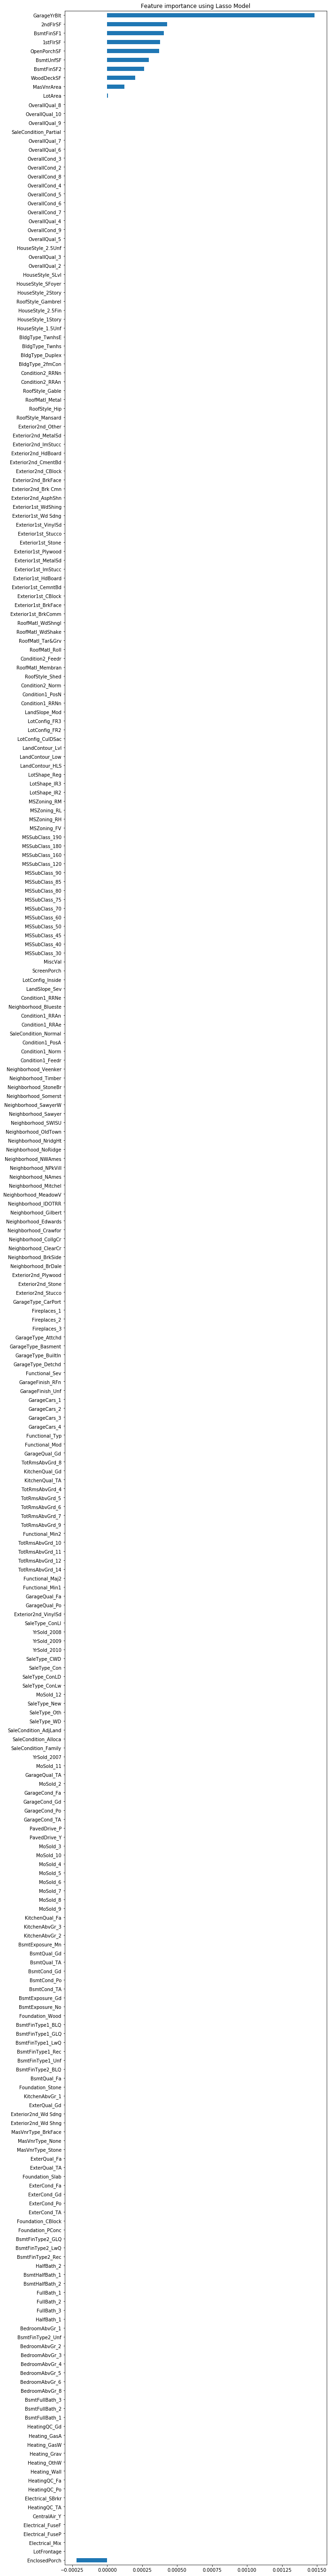

In [178]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 100)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

- Important Features:

['GarageYrBlt', '2ndFlrSF', 'BsmtFinSF1', 'OpenPorchSF', 'BsmtUnfSF', 'BsmtFinSF2', 'WoodDeckSF', 'NasVnrArea', 'LotArea']

In [179]:
# lasso regression
lm = Lasso(alpha=1)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print('r2_score of train data:',r2_score(y_true=y_train, y_pred=y_train_pred))
print('RMSse of train data:',mean_squared_error(y_train, y_train_pred))

y_test_pred = lm.predict(X_test)
print('\nr2_score of test data',r2_score(y_true=y_test, y_pred=y_test_pred))
print('RMSE of test data',mean_squared_error(y_test, y_test_pred))

r2_score of train data: 0.7444166046104669
RMSse of train data: 0.0383990354734927

r2_score of test data 0.7084731168369796
RMSE of test data 0.04260867511808897
